# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.integrate import cumtrapz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR

# Straight Slow

## Accelerometer

In [2]:
ss_ac = pd.read_csv("Straight_slow-2024-10-16_21-29-36\Accelerometer.csv")
ss_ac

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\514123768.py:1: SyntaxWarning: invalid escape sequence '\A'
  ss_ac = pd.read_csv("Straight_slow-2024-10-16_21-29-36\Accelerometer.csv")


,time,seconds_elapsed,z,y,x
0,1729114176181976300,0.151976,0.138256,-0.022989,-0.004539
1,1729114176219911000,0.189911,0.199427,-0.032416,-0.003736
2,1729114176257845800,0.227846,0.118507,-0.017880,-0.005607
3,1729114176295780400,0.265780,0.130477,-0.019850,0.007658
4,1729114176333715200,0.303715,0.096210,-0.008136,0.011244
...,...,...,...,...,...
2742,1729114280198955500,104.168956,-0.003205,0.001204,0.001735
2743,1729114280236890000,104.206890,-0.001100,-0.001666,0.001348
2744,1729114280274824700,104.244825,-0.013041,0.005332,0.008535
2745,1729114280312759000,104.282759,1.260686,-0.324834,0.040107


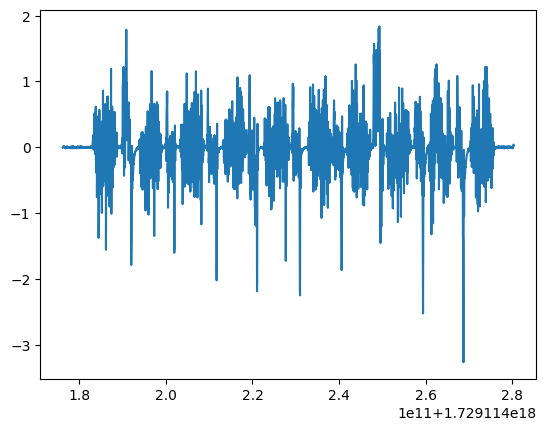

In [3]:
plt.plot(ss_ac.time, ss_ac.x)

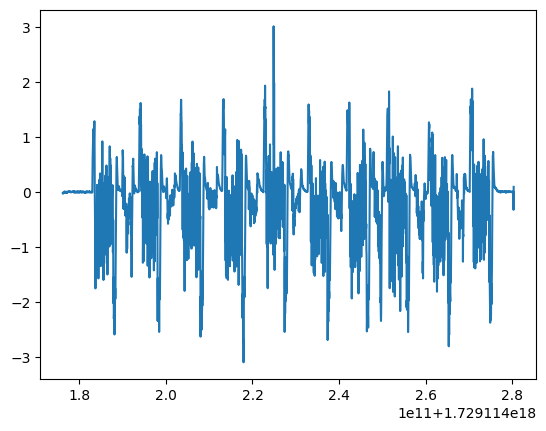

In [4]:
plt.plot(ss_ac.time, ss_ac.y)

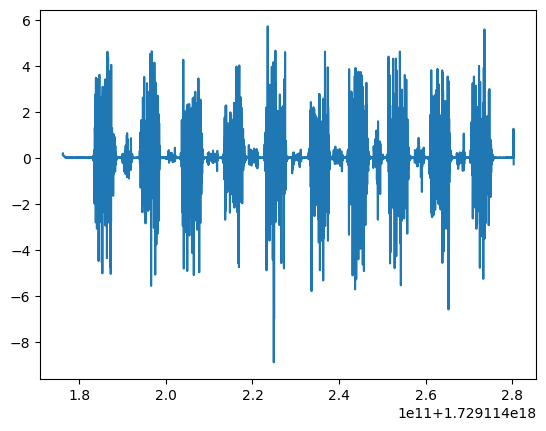

In [5]:
plt.plot(ss_ac.time, ss_ac.z)

## Gyroscope

In [6]:
ss_gy = pd.read_csv("Straight_slow-2024-10-16_21-29-36\Gyroscope.csv")
ss_gy

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\3073460579.py:1: SyntaxWarning: invalid escape sequence '\G'
  ss_gy = pd.read_csv("Straight_slow-2024-10-16_21-29-36\Gyroscope.csv")


,time,seconds_elapsed,z,y,x
0,1729114176194459000,0.164459,0.000458,-0.000458,-0.000993
1,1729114176227792000,0.197792,0.000000,-0.000382,-0.000534
2,1729114176261124900,0.231125,0.001145,0.000153,0.000229
3,1729114176294458000,0.264458,0.000076,0.000458,-0.000840
4,1729114176327791000,0.297791,0.000611,0.000000,0.000229
...,...,...,...,...,...
3121,1729114280226815000,104.196815,0.000687,0.000153,0.000229
3122,1729114280260148000,104.230148,-0.000076,0.000305,0.000458
3123,1729114280293481000,104.263481,0.002214,-0.012217,0.029397
3124,1729114280326814000,104.296814,0.001069,0.000153,0.007941


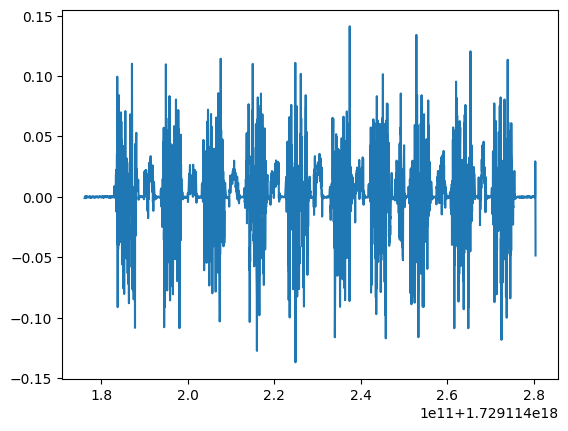

In [7]:
plt.plot(ss_gy.time, ss_gy.x)

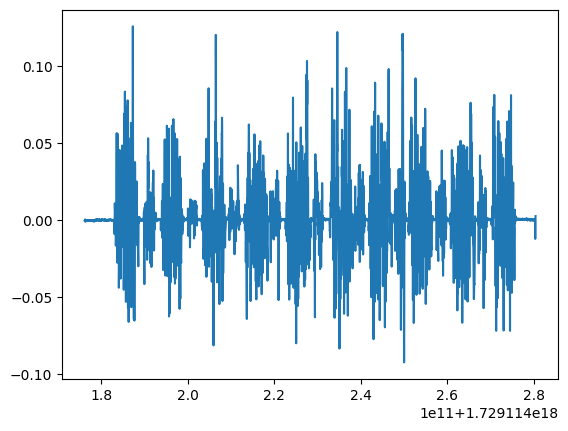

In [8]:
plt.plot(ss_gy.time, ss_gy.y)

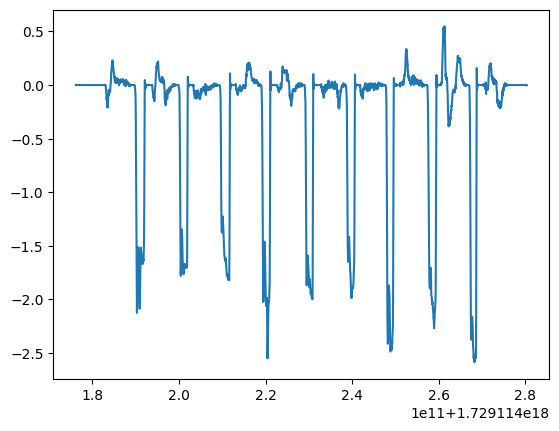

In [9]:
plt.plot(ss_gy.time, ss_gy.z)

## Total Acceleraion

In [10]:
ss_tac = pd.read_csv("Straight_slow-2024-10-16_21-29-36\TotalAcceleration.csv")
ss_tac

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\3719941169.py:1: SyntaxWarning: invalid escape sequence '\T'
  ss_tac = pd.read_csv("Straight_slow-2024-10-16_21-29-36\TotalAcceleration.csv")


,time,seconds_elapsed,z,y,x
0,1729114176111109000,0.081109,9.786345,-0.085843,-0.114855
1,1729114176149041700,0.119042,9.968200,-0.114556,-0.114855
2,1729114176186976300,0.156976,9.819845,-0.078664,-0.138784
3,1729114176224911000,0.194911,9.915558,-0.085843,-0.107677
4,1729114176262845700,0.232846,9.838987,-0.090628,-0.129212
...,...,...,...,...,...
2744,1729114280203955500,104.173956,9.903594,-0.026022,-0.246461
2745,1729114280241890000,104.211890,9.910772,-0.037986,-0.260818
2746,1729114280279824600,104.249825,9.896416,-0.037986,-0.260818
2747,1729114280317759200,104.287759,8.043473,0.359522,-0.337388


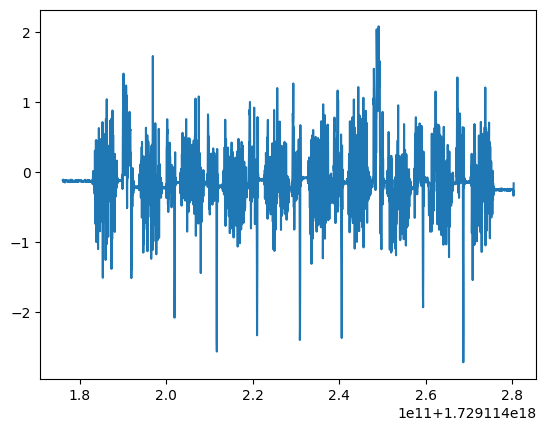

In [11]:
plt.plot(ss_tac.time, ss_tac.x)

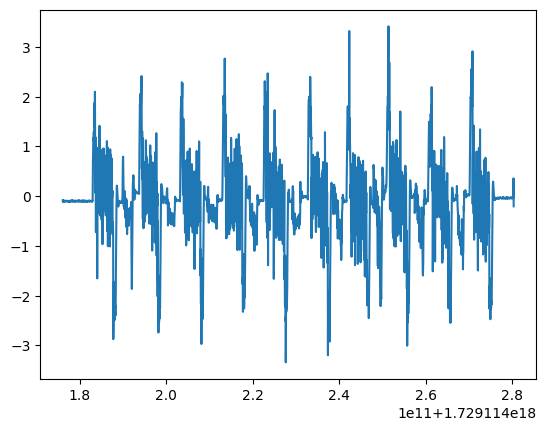

In [12]:
plt.plot(ss_tac.time, ss_tac.y)

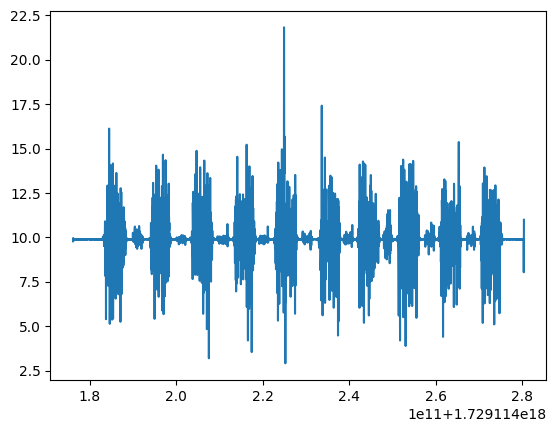

In [13]:
plt.plot(ss_tac.time, ss_tac.z)

# Straight Fast

## Accelerometer

In [14]:
sf_ac = pd.read_csv("Straight_fast-2024-10-16_21-34-59\Accelerometer.csv")
sf_ac

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\3727402042.py:1: SyntaxWarning: invalid escape sequence '\A'
  sf_ac = pd.read_csv("Straight_fast-2024-10-16_21-34-59\Accelerometer.csv")


,time,seconds_elapsed,z,y,x
0,1729114499696945200,0.025945,0.000000,0.000000,0.000000
1,1729114499734879500,0.063879,-0.110129,0.009605,-0.011992
2,1729114499772813600,0.101813,0.054107,-0.020007,-0.013428
3,1729114499810748000,0.139748,-0.054379,0.005427,-0.014331
4,1729114499848682000,0.177682,0.046551,0.003205,-0.004356
...,...,...,...,...,...
2581,1729114597605043500,97.934043,0.036628,-0.004948,0.003000
2582,1729114597642977500,97.971978,0.084298,-0.001620,0.012393
2583,1729114597680911600,98.009912,0.033235,0.011912,0.011345
2584,1729114597718845700,98.047846,4.336559,-0.633932,0.193295


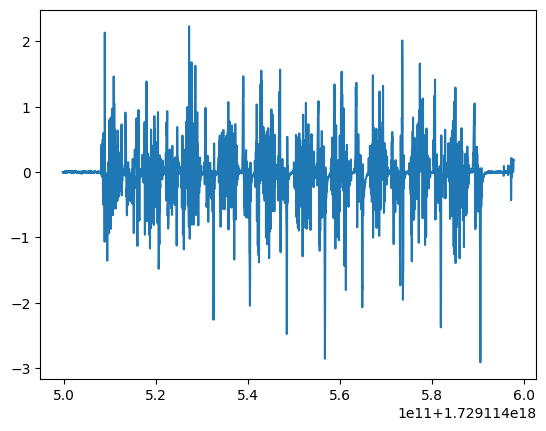

In [15]:
plt.plot(sf_ac.time, sf_ac.x)

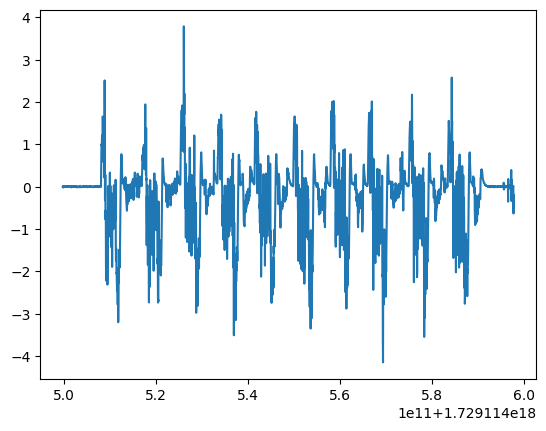

In [16]:
plt.plot(sf_ac.time, sf_ac.y)

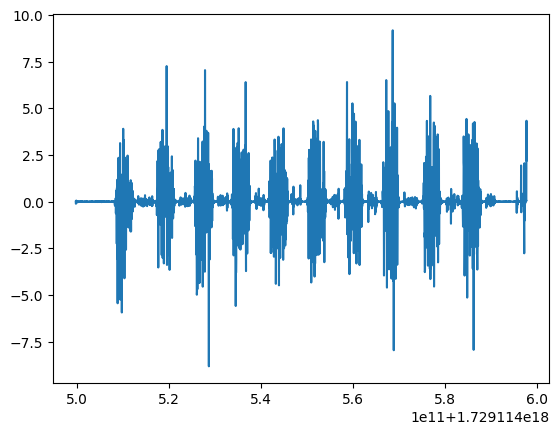

In [17]:
plt.plot(sf_ac.time, sf_ac.z)

## Gyroscope

In [18]:
sf_gy = pd.read_csv("Straight_fast-2024-10-16_21-34-59\Gyroscope.csv")
sf_gy

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\2459199311.py:1: SyntaxWarning: invalid escape sequence '\G'
  sf_gy = pd.read_csv("Straight_fast-2024-10-16_21-34-59\Gyroscope.csv")


,time,seconds_elapsed,z,y,x
0,1729114499724758300,0.053758,0.000076,0.000229,0.000229
1,1729114499758091300,0.087091,-0.000076,-0.000458,-0.000993
2,1729114499791424300,0.120424,0.000382,0.000458,0.001069
3,1729114499824757200,0.153757,0.000382,-0.000534,-0.000153
4,1729114499858090500,0.187091,0.000076,-0.000153,-0.000153
...,...,...,...,...,...
2937,1729114597623839500,97.952840,-0.000305,-0.000534,-0.000687
2938,1729114597657172500,97.986172,-0.000153,0.000076,0.000534
2939,1729114597690505500,98.019505,-0.000611,0.019547,0.028023
2940,1729114597723838500,98.052838,0.024205,0.076203,0.156911


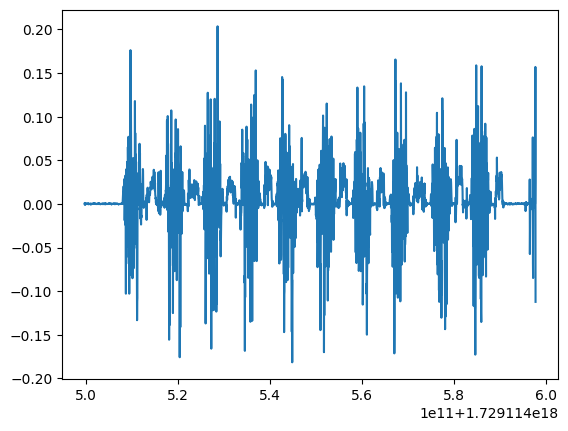

In [19]:
plt.plot(sf_gy.time, sf_gy.x)

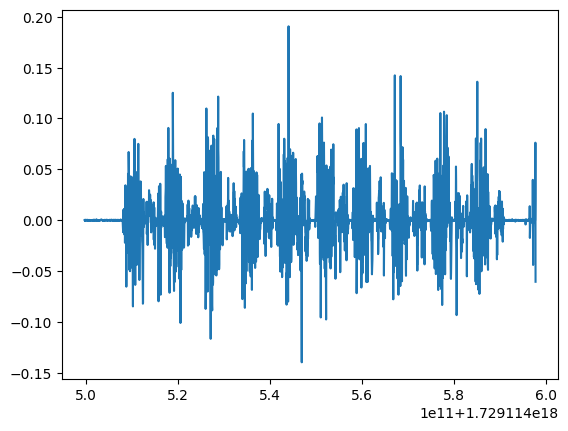

In [20]:
plt.plot(sf_gy.time, sf_gy.y)

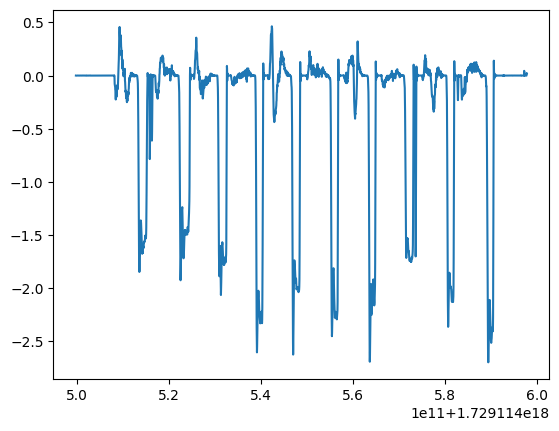

In [21]:
plt.plot(sf_gy.time, sf_gy.z)

## Total Acceleration

In [22]:
sf_tac = pd.read_csv("Straight_fast-2024-10-16_21-34-59\TotalAcceleration.csv")
sf_tac

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\835342035.py:1: SyntaxWarning: invalid escape sequence '\T'
  sf_tac = pd.read_csv("Straight_fast-2024-10-16_21-34-59\TotalAcceleration.csv")


,time,seconds_elapsed,z,y,x
0,1729114499739879400,0.068879,9.915558,-0.069093,-0.131605
1,1729114499777813800,0.106814,9.874880,-0.057129,-0.114855
2,1729114499815747800,0.144748,9.908380,-0.071486,-0.133998
3,1729114499853682000,0.182682,9.886844,-0.064307,-0.131605
4,1729114499891616300,0.220616,9.901201,-0.076271,-0.138784
...,...,...,...,...,...
2580,1729114597610043400,97.939043,9.951450,-0.150449,-0.205783
2581,1729114597647977500,97.976978,9.855738,-0.133699,-0.229711
2582,1729114597685911800,98.014912,9.937094,-0.143270,-0.205783
2583,1729114597723846000,98.052846,3.501896,0.701695,-0.775574


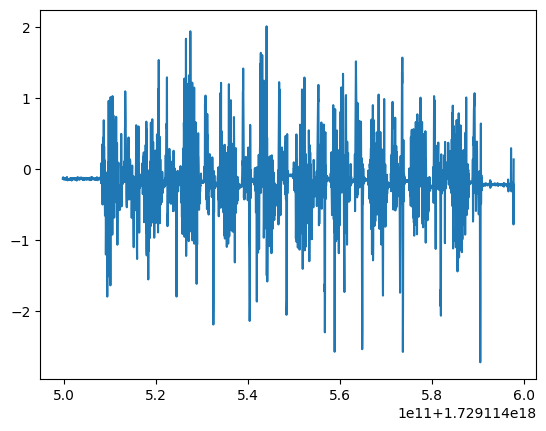

In [23]:
plt.plot(sf_tac.time, sf_tac.x)

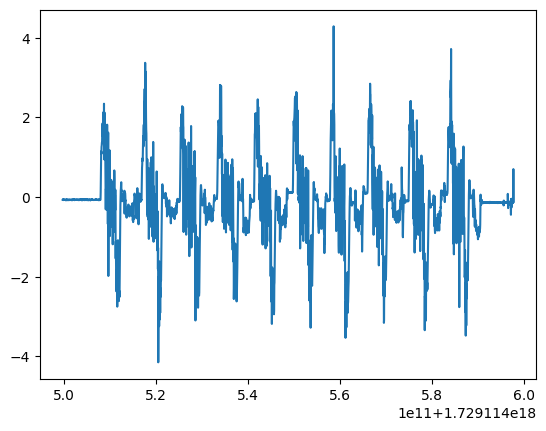

In [24]:
plt.plot(sf_tac.time, sf_tac.y)

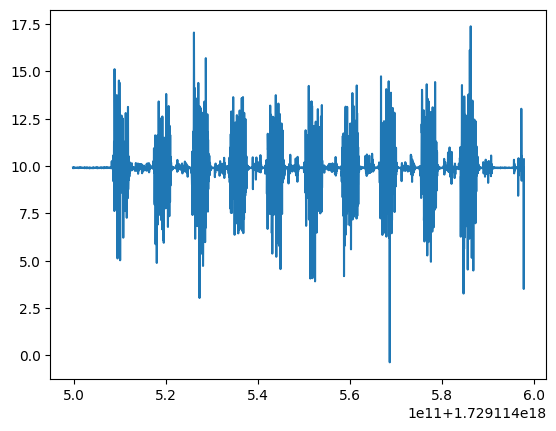

In [25]:
plt.plot(sf_tac.time, sf_tac.z)

# Curve Slow

## Accelerometer

In [26]:
cs_ac = pd.read_csv("Curve_slow-2024-10-16_21-38-29\Accelerometer.csv")
cs_ac

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\622378521.py:1: SyntaxWarning: invalid escape sequence '\A'
  cs_ac = pd.read_csv("Curve_slow-2024-10-16_21-38-29\Accelerometer.csv")


,time,seconds_elapsed,z,y,x
0,1729114709796172300,0.052172,0.000000,0.000000,0.000000
1,1729114709834106600,0.090107,-0.256169,0.037665,-0.009615
2,1729114709872040700,0.128041,0.160883,-0.024792,0.024385
3,1729114709909975000,0.165975,-0.163143,0.028428,-0.004211
4,1729114709947909400,0.203909,0.098420,-0.015674,0.012540
...,...,...,...,...,...
2973,1729114822575113700,112.831114,-0.000735,0.003801,-0.001142
2974,1729114822613048000,112.869048,-0.003042,-0.002776,0.010107
2975,1729114822650982400,112.906982,-0.002964,0.010719,0.002897
2976,1729114822688916700,112.944917,1.575144,-0.176965,0.185672


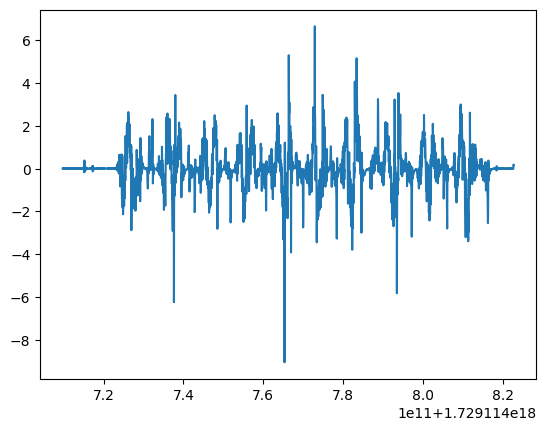

In [27]:
plt.plot(cs_ac.time, cs_ac.x)

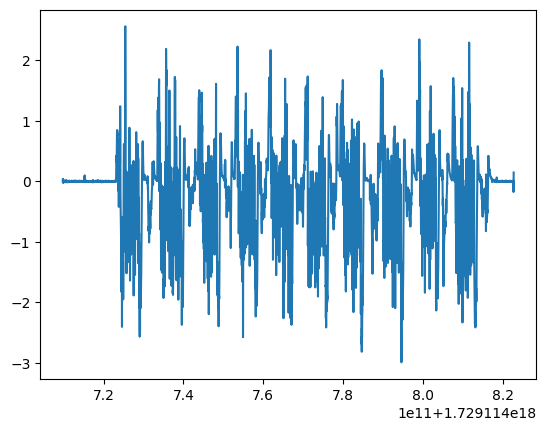

In [28]:
plt.plot(cs_ac.time, cs_ac.y)

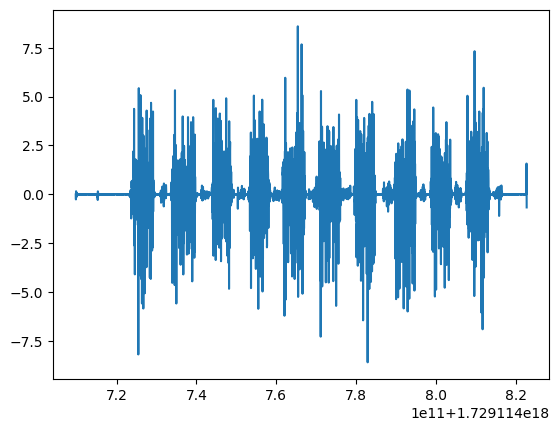

In [29]:
plt.plot(cs_ac.time, cs_ac.z)

## Gyroscope

In [30]:
cs_gy = pd.read_csv("Curve_slow-2024-10-16_21-38-29\Gyroscope.csv")
cs_gy

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\1832433781.py:1: SyntaxWarning: invalid escape sequence '\G'
  cs_gy = pd.read_csv("Curve_slow-2024-10-16_21-38-29\Gyroscope.csv")


,time,seconds_elapsed,z,y,x
0,1729114709823789000,0.079789,0.000153,0.000534,0.000534
1,1729114709857122000,0.113122,0.000382,-0.000916,-0.001603
2,1729114709890455000,0.146455,0.000534,0.000382,0.001756
3,1729114709923788000,0.179788,0.000382,-0.001298,-0.001298
4,1729114709957121000,0.213121,-0.000076,0.000382,0.000840
...,...,...,...,...,...
3383,1729114822589397000,112.845397,0.000458,-0.000840,-0.000534
3384,1729114822622730000,112.878730,0.000458,-0.000229,-0.000382
3385,1729114822656063000,112.912063,-0.000229,0.004963,0.003894
3386,1729114822689396000,112.945396,-0.005498,0.045279,0.081090


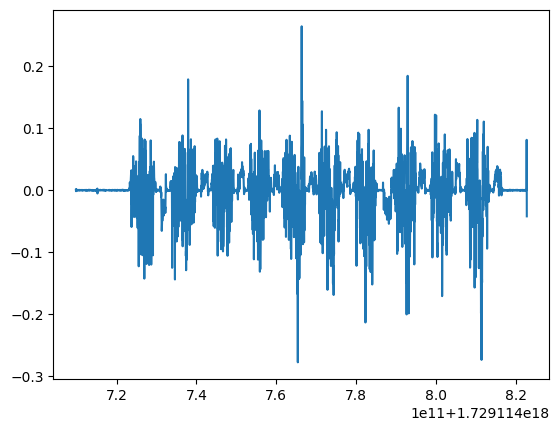

In [31]:
plt.plot(cs_gy.time, cs_gy.x)

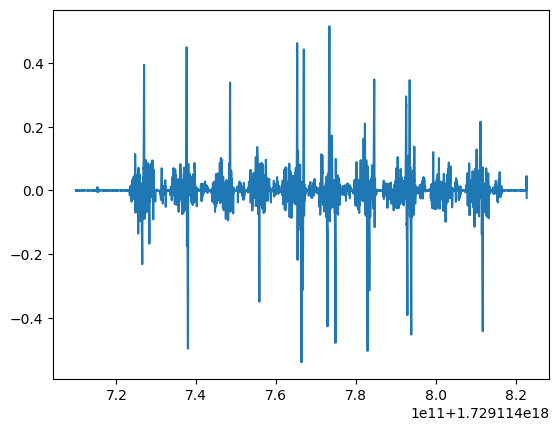

In [32]:
plt.plot(cs_gy.time, cs_gy.y)

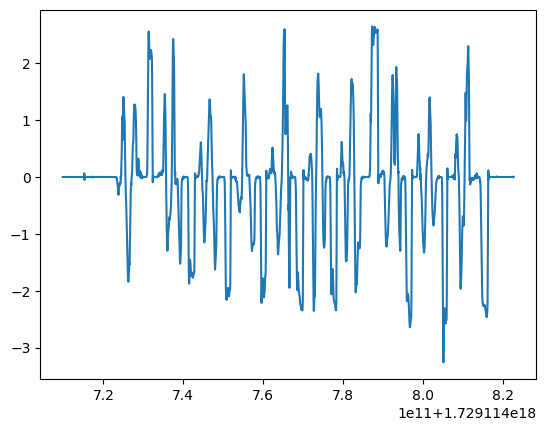

In [33]:
plt.plot(cs_gy.time, cs_gy.z)

## Total Acceleration

In [34]:
cs_tac = pd.read_csv("Curve_slow-2024-10-16_21-38-29\TotalAcceleration.csv")
cs_tac

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\660537518.py:1: SyntaxWarning: invalid escape sequence '\T'
  cs_tac = pd.read_csv("Curve_slow-2024-10-16_21-38-29\TotalAcceleration.csv")


,time,seconds_elapsed,z,y,x
0,1729114709820139300,0.076139,9.614062,-0.021236,-0.177069
1,1729114709858073600,0.114073,10.100104,-0.095414,-0.141177
2,1729114709896008000,0.152008,9.731311,-0.035593,-0.177069
3,1729114709933942300,0.189942,10.008878,-0.083450,-0.160319
4,1729114709971876400,0.227876,9.822238,-0.059521,-0.177069
...,...,...,...,...,...
2973,1729114822599081000,112.855081,9.894023,-0.090628,-0.148355
2974,1729114822637015300,112.893015,9.894023,-0.076271,-0.155533
2975,1729114822674949600,112.930950,11.565110,-0.256032,0.026321
2976,1729114822712884000,112.968884,9.302696,0.060120,0.004786


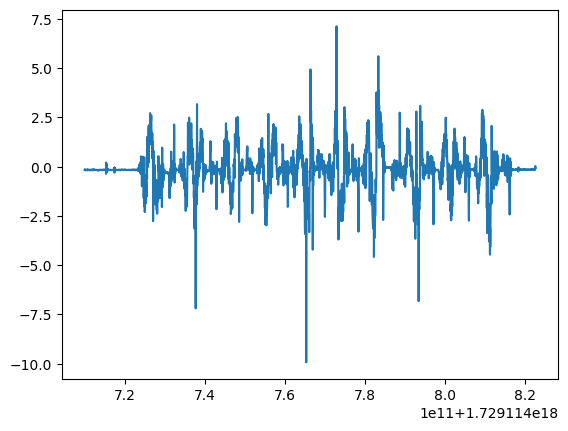

In [35]:
plt.plot(cs_tac.time, cs_tac.x)

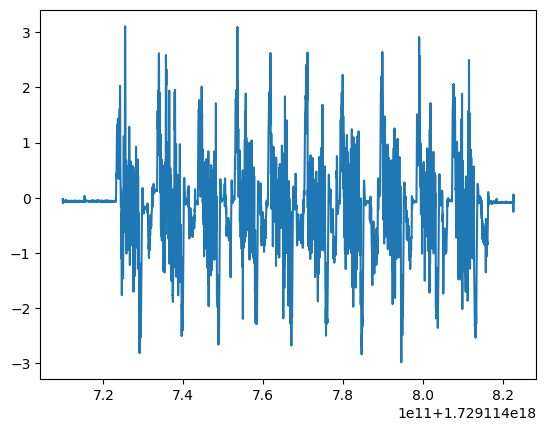

In [36]:
plt.plot(cs_tac.time, cs_tac.y)

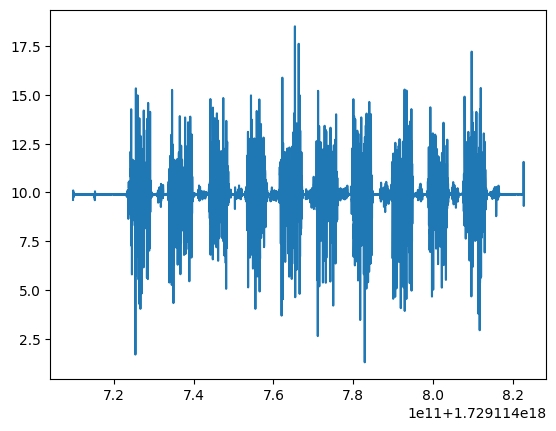

In [37]:
plt.plot(cs_tac.time, cs_tac.z)

# Curve Fast

## Accelerometer

In [38]:
cf_ac = pd.read_csv("Curve_fast-2024-10-16_21-43-07\Accelerometer.csv")
cf_ac

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\2818319131.py:1: SyntaxWarning: invalid escape sequence '\A'
  cf_ac = pd.read_csv("Curve_fast-2024-10-16_21-43-07\Accelerometer.csv")


,time,seconds_elapsed,z,y,x
0,1729114987950340400,0.028340,0.000000,0.000000,0.000000
1,1729114987987895800,0.065896,0.001596,0.005874,-0.011253
2,1729114988025830400,0.103830,0.044533,-0.006611,0.016885
3,1729114988063764700,0.141765,-0.041039,-0.010302,-0.018762
4,1729114988101699300,0.179699,0.039904,-0.030601,0.003223
...,...,...,...,...,...
2920,1729115098718901500,110.796902,0.001064,-0.003592,-0.005816
2921,1729115098756836000,110.834836,0.003590,-0.013272,-0.008080
2922,1729115098794770400,110.872771,0.001181,0.001149,0.010580
2923,1729115098832705000,110.910705,-1.269129,0.293492,-0.059588


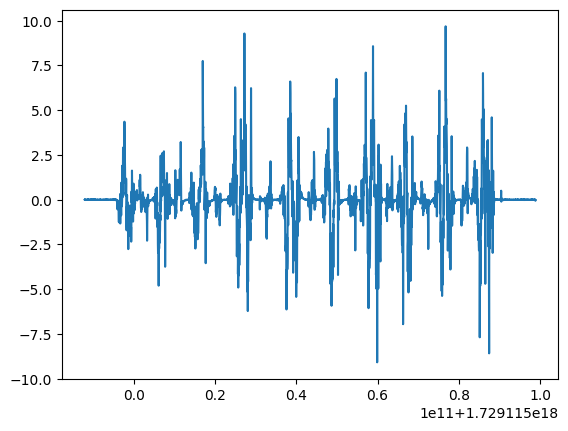

In [39]:
plt.plot(cf_ac.time, cf_ac.x)

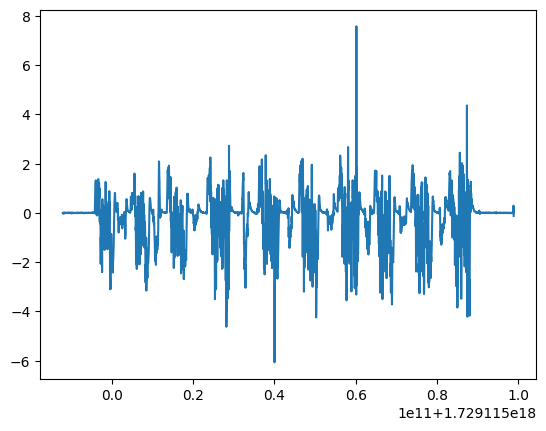

In [40]:
plt.plot(cf_ac.time, cf_ac.y)

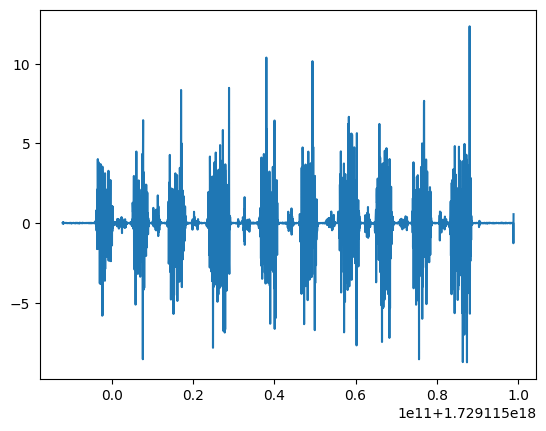

In [41]:
plt.plot(cf_ac.time, cf_ac.z)

## Gyroscope

In [42]:
cf_gy = pd.read_csv("Curve_fast-2024-10-16_21-43-07\Gyroscope.csv")
cf_gy

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\28274298.py:1: SyntaxWarning: invalid escape sequence '\G'
  cf_gy = pd.read_csv("Curve_fast-2024-10-16_21-43-07\Gyroscope.csv")


,time,seconds_elapsed,z,y,x
0,1729114987987846100,0.065846,0.000458,-0.000611,-0.001985
1,1729114988021179100,0.099179,-0.000305,0.000916,0.000611
2,1729114988054512000,0.132512,-0.000153,-0.000076,-0.000764
3,1729114988087845000,0.165845,0.000611,0.000000,-0.000382
4,1729114988121178000,0.199178,-0.000153,0.000534,0.000458
...,...,...,...,...,...
3322,1729115098720141300,110.798141,-0.000153,-0.000229,0.000000
3323,1729115098753474300,110.831474,-0.000153,0.000382,-0.000458
3324,1729115098786807300,110.864807,0.000458,0.001527,0.021609
3325,1729115098820140300,110.898140,-0.001145,0.015118,0.050242


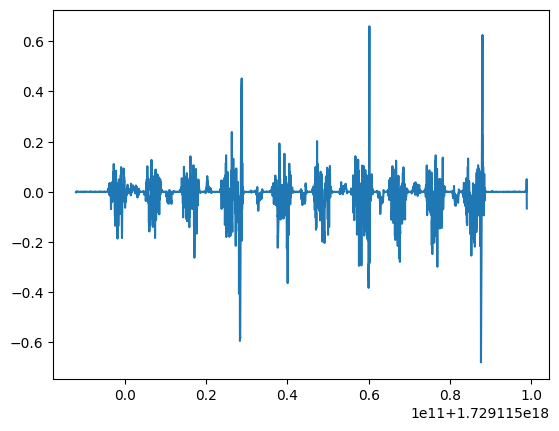

In [43]:
plt.plot(cf_gy.time, cf_gy.x)

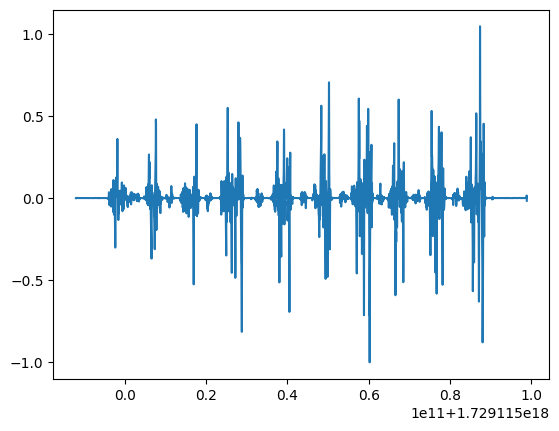

In [44]:
plt.plot(cf_gy.time, cf_gy.y)

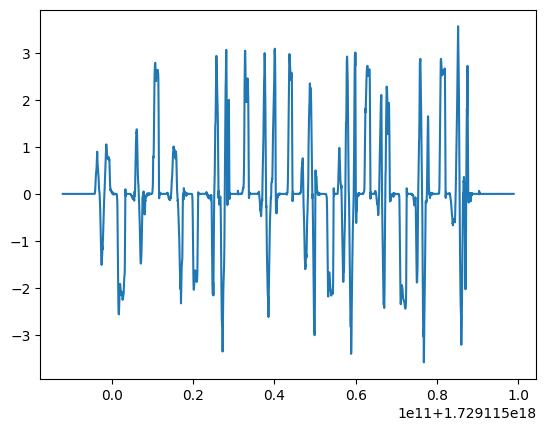

In [45]:
plt.plot(cf_gy.time, cf_gy.z)

## Total Accerelation

In [46]:
cf_tac = pd.read_csv("Curve_fast-2024-10-16_21-43-07\TotalAcceleration.csv")
cf_tac

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\3058581193.py:1: SyntaxWarning: invalid escape sequence '\T'
  cf_tac = pd.read_csv("Curve_fast-2024-10-16_21-43-07\TotalAcceleration.csv")


,time,seconds_elapsed,z,y,x
0,1729114988011863000,0.089863,9.937094,-0.071486,-0.143569
1,1729114988049797600,0.127798,9.836595,-0.078664,-0.181855
2,1729114988087732200,0.165732,9.932307,-0.107378,-0.157926
3,1729114988125666600,0.203667,9.860523,-0.088235,-0.165105
4,1729114988163601200,0.241601,9.925129,-0.090628,-0.157926
...,...,...,...,...,...
2918,1729115098704934100,110.782934,9.898808,-0.037986,-0.210568
2919,1729115098742868700,110.820869,9.901201,-0.047557,-0.212961
2920,1729115098780803300,110.858803,9.898808,-0.026022,-0.193819
2921,1729115098818738000,110.896738,8.627621,0.282652,-0.263211


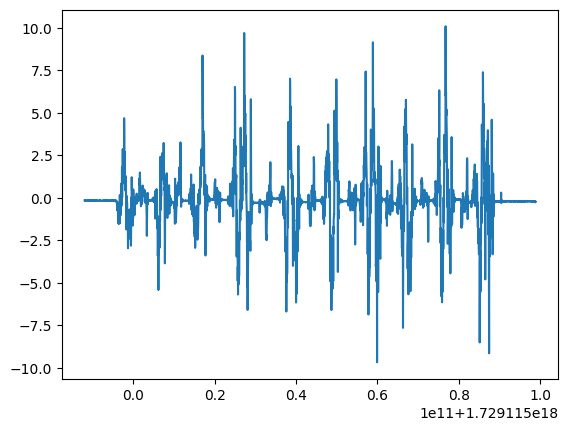

In [47]:
plt.plot(cf_tac.time, cf_tac.x)

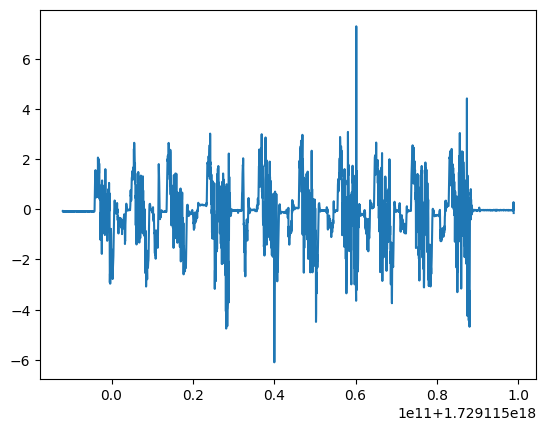

In [48]:
plt.plot(cf_tac.time, cf_tac.y)

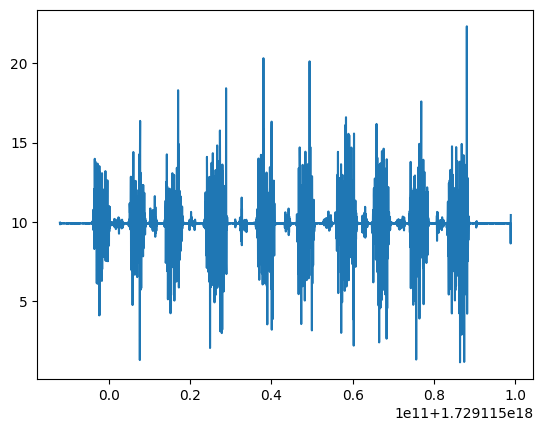

In [49]:
plt.plot(cf_tac.time, cf_tac.z)

# Data Cleaning

In [50]:
def find_active(x, y, z, min_treshold, max_treshold):
    magnitude = np.sqrt(x**2 + y**2 + z**2)
    active = (magnitude > min_treshold) and (magnitude < max_treshold)

    return magnitude, active

In [51]:
def trim_data(data = None, begin = 0, end = 0):
    if not data.empty:
        total = data.shape[0]
        data = data.tail(-begin)
        data = data.head(total-end)

        return data

## Cleaning Straight Slow Accelerometer

In [52]:
tmp_df = pd.DataFrame(columns=["magnitude","active"])

for index, row in ss_ac.iterrows():
    x = row.x
    y = row.y
    z = row.z

    tmp_df.loc[len(tmp_df)] = find_active(x, y, z, min_treshold=2, max_treshold=5)

ss_ac = pd.concat([ss_ac, tmp_df], axis=1)

ss_ac


,time,seconds_elapsed,z,y,x,magnitude,active
0,1729114176181976300,0.151976,0.138256,-0.022989,-0.004539,0.140228,False
1,1729114176219911000,0.189911,0.199427,-0.032416,-0.003736,0.202079,False
2,1729114176257845800,0.227846,0.118507,-0.017880,-0.005607,0.119980,False
3,1729114176295780400,0.265780,0.130477,-0.019850,0.007658,0.132200,False
4,1729114176333715200,0.303715,0.096210,-0.008136,0.011244,0.097205,False
...,...,...,...,...,...,...,...
2742,1729114280198955500,104.168956,-0.003205,0.001204,0.001735,0.003838,False
2743,1729114280236890000,104.206890,-0.001100,-0.001666,0.001348,0.002409,False
2744,1729114280274824700,104.244825,-0.013041,0.005332,0.008535,0.016472,False
2745,1729114280312759000,104.282759,1.260686,-0.324834,0.040107,1.302480,False


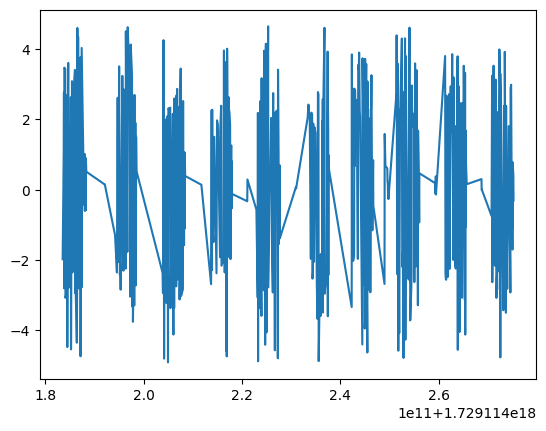

In [53]:
ss_ac.drop(ss_ac[ss_ac['active'] != True].index, inplace=True)

plt.plot(ss_ac.time, ss_ac.z)

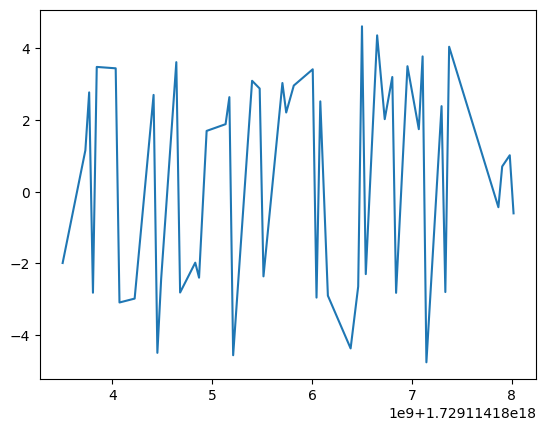

In [54]:
points_per_run = 48
plt.plot(ss_ac.head(points_per_run).time, ss_ac.head(points_per_run).z)

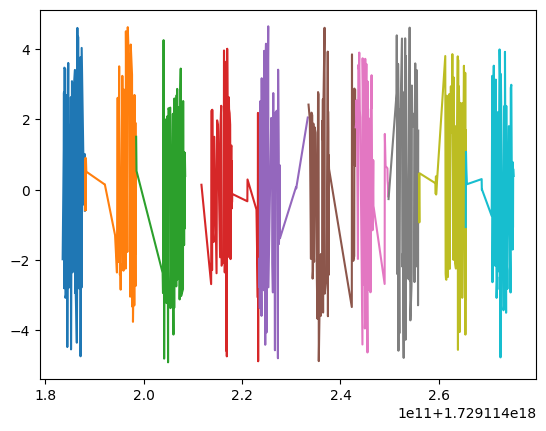

In [55]:
points_per_run = 48
increment = 48

for i in range(0,10):
    plt.plot(ss_ac[points_per_run - increment:points_per_run].time, ss_ac[points_per_run - increment:points_per_run].z)

    points_per_run += increment

## Flattening Straight Slow Data into Rows

In [56]:
points_per_run = 48
increment = 48

ss_data_rows = pd.DataFrame()

for i in range(0,10):
    tmp_df = ss_ac[points_per_run - increment:points_per_run]

    time_taken = max(tmp_df.seconds_elapsed) - min(tmp_df.seconds_elapsed)

    one_row = pd.DataFrame(tmp_df.magnitude.values.flatten()).transpose()
    one_row['time'] = [time_taken]
    # one_row['label'] = ["SS"]

    ss_data_rows = pd.concat([ss_data_rows, one_row], ignore_index=True, sort=False)

    points_per_run += increment


ss_data_rows.columns = ss_data_rows.columns.astype(str)

ss_data_rows

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,time
0,2.371576,2.122112,2.909207,2.896534,3.585578,3.562775,3.186043,3.018978,3.135702,4.709179,...,3.777659,4.879147,2.398383,3.105318,4.051899,2.096247,2.044812,2.530960,2.325784,4.514235
1,2.211903,2.085911,2.666916,2.343165,2.031213,2.204109,2.014863,2.078244,2.076389,2.082099,...,3.636804,2.356534,2.545400,2.239837,2.883761,3.001038,2.583434,2.014062,3.317880,10.356184
2,2.962727,2.035539,2.427897,3.053663,4.277031,4.884827,2.773665,3.098241,3.322927,2.629502,...,2.069469,2.261327,2.167470,2.449125,2.583810,2.581053,2.071538,2.408598,2.111740,9.976836
3,2.029873,2.960320,2.601397,2.766443,2.728132,2.006235,2.030639,2.203344,2.755221,2.347860,...,2.863282,2.218723,2.060986,2.023459,3.150228,2.192580,4.952481,2.025808,2.731471,11.645966
4,2.823050,2.034155,3.416577,2.283977,2.600332,2.550683,3.638719,3.265535,2.213674,2.490698,...,2.780290,2.140177,2.336947,2.031931,2.037253,2.515832,2.188437,2.252081,2.315338,9.900967
5,2.645902,2.202630,2.283878,2.231912,2.424722,2.562714,2.558824,2.324147,2.023054,2.238441,...,2.074128,3.621369,3.863420,2.285943,2.180671,2.162177,3.163396,2.069397,3.129875,9.483683
6,2.168176,2.444815,2.750544,2.242590,2.142738,3.772134,3.695413,3.922720,2.588071,2.322422,...,2.521286,2.767169,2.388169,2.214194,2.346595,2.436690,2.293517,2.366243,2.222404,6.638574
7,2.068471,2.826105,4.494189,3.062824,2.370137,2.559930,3.992951,3.089477,4.630917,2.481509,...,3.646228,2.242434,3.404361,2.387664,2.101436,2.225410,2.244414,3.550783,2.665907,6.031615
8,2.595993,2.280732,2.111242,2.047253,2.002173,2.142381,2.999113,2.091458,3.865743,2.605269,...,2.416793,2.482181,3.160907,3.562111,2.703941,4.241735,4.476408,4.636997,3.140430,9.483667
9,2.053901,2.524367,2.363959,2.016465,2.883691,3.332334,2.290435,2.059972,3.652162,3.051133,...,2.941197,3.257938,2.369738,2.442004,2.208651,2.483198,2.382410,2.325380,2.092158,9.711267


In [57]:
ss_data_rows.to_csv("./dataset/ss_data_rows.csv",index=False)

## Cleaning Straight Fast Accelerometer

In [58]:
tmp_df = pd.DataFrame(columns=["magnitude","active"])

for index, row in sf_ac.iterrows():
    x = row.x
    y = row.y
    z = row.z

    tmp_df.loc[len(tmp_df)] = find_active(x, y, z, min_treshold=2, max_treshold=4.5)

sf_ac = pd.concat([sf_ac, tmp_df], axis=1)

sf_ac

,time,seconds_elapsed,z,y,x,magnitude,active
0,1729114499696945200,0.025945,0.000000,0.000000,0.000000,0.000000,False
1,1729114499734879500,0.063879,-0.110129,0.009605,-0.011992,0.111196,False
2,1729114499772813600,0.101813,0.054107,-0.020007,-0.013428,0.059229,False
3,1729114499810748000,0.139748,-0.054379,0.005427,-0.014331,0.056497,False
4,1729114499848682000,0.177682,0.046551,0.003205,-0.004356,0.046864,False
...,...,...,...,...,...,...,...
2581,1729114597605043500,97.934043,0.036628,-0.004948,0.003000,0.037082,False
2582,1729114597642977500,97.971978,0.084298,-0.001620,0.012393,0.085220,False
2583,1729114597680911600,98.009912,0.033235,0.011912,0.011345,0.037083,False
2584,1729114597718845700,98.047846,4.336559,-0.633932,0.193295,4.386910,True


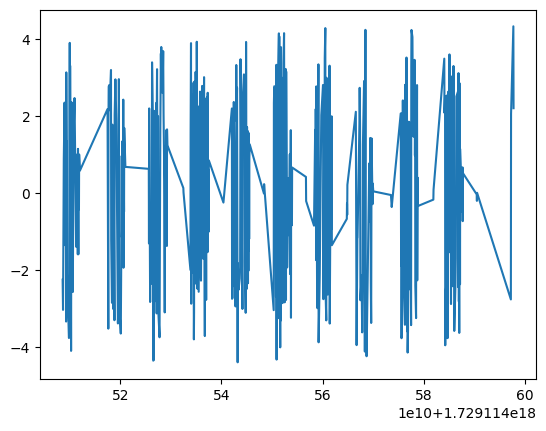

In [59]:
sf_ac.drop(sf_ac[sf_ac['active'] != True].index, inplace=True)

plt.plot(sf_ac.time, sf_ac.z)

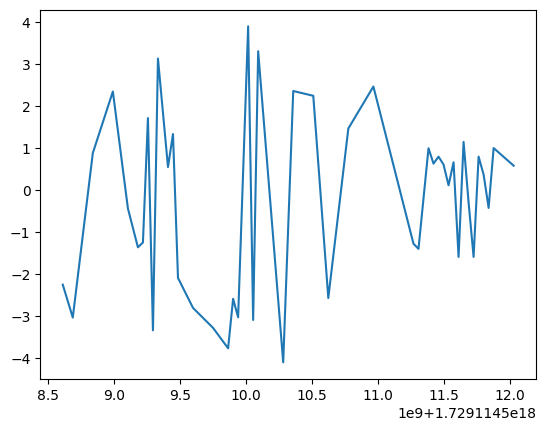

In [60]:
points_per_run = 44
plt.plot(sf_ac.head(points_per_run).time, sf_ac.head(points_per_run).z)

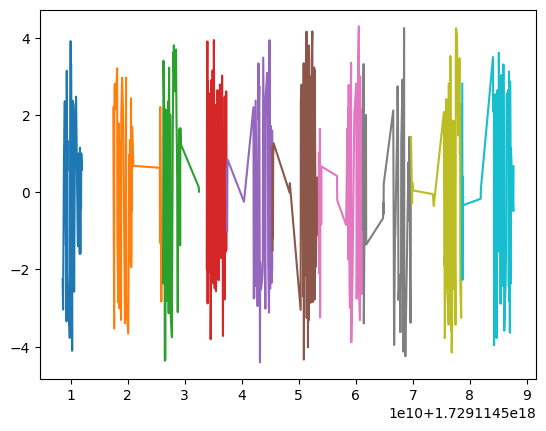

In [61]:
points_per_run = 44
increment = 44

for i in range(0,10):
    plt.plot(sf_ac[points_per_run - increment:points_per_run].time, sf_ac[points_per_run - increment:points_per_run].z)

    points_per_run += increment

## Flattening Straight Fast Data into Rows

In [62]:
points_per_run = 44
increment = 44

sf_data_rows = pd.DataFrame()

for i in range(0,10):
    tmp_df = sf_ac[points_per_run - increment:points_per_run]

    time_taken = max(tmp_df.seconds_elapsed) - min(tmp_df.seconds_elapsed)

    one_row = pd.DataFrame(tmp_df.magnitude.values.flatten()).transpose()
    one_row['time'] = [time_taken]
    # one_row['label'] = ["SF"]

    sf_data_rows = pd.concat([sf_data_rows, one_row], ignore_index=True, sort=False)

    points_per_run += increment


sf_data_rows.columns = sf_data_rows.columns.astype(str)

sf_data_rows

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,time
0,2.715793,3.451921,2.847930,2.520625,2.295387,2.184215,2.212477,2.541820,3.727414,3.271509,...,2.722196,3.013193,2.261778,2.698033,3.300384,2.430632,2.002075,2.501843,2.004883,3.414077
1,2.349730,4.045139,2.017969,2.821946,2.929542,2.210115,2.811800,3.588242,2.222862,2.928176,...,2.024767,2.572843,2.205079,2.034230,2.333482,2.423693,2.323870,3.238367,2.324386,8.497260
2,2.798992,3.440837,2.271195,2.083719,4.399298,4.345245,2.481314,2.289419,2.957538,2.123119,...,2.916371,2.731337,2.058413,2.111066,2.169513,2.377412,2.298850,2.272302,2.030336,6.297076
3,2.449133,2.016092,3.902702,3.255774,2.947191,2.475685,2.631105,2.472141,2.006035,3.888945,...,3.202871,2.333157,3.011344,3.371351,2.750013,3.062585,2.716737,4.096598,2.643325,3.452011
4,2.328725,2.358303,2.189483,2.072514,2.254124,3.242123,2.849933,2.123119,2.792120,2.423267,...,3.139261,3.088831,2.575867,2.093811,2.502501,2.999478,2.163286,2.960040,3.017243,7.966179
5,2.637776,2.513295,2.134894,2.559395,2.022107,2.484892,2.435474,3.383720,2.405925,2.792618,...,3.291481,2.919464,3.199975,2.111689,2.419192,2.656623,2.316345,2.760768,3.078082,8.004111
6,2.257003,3.332752,2.014133,2.870286,3.839150,3.209215,2.575845,2.677402,2.263200,2.046029,...,3.434262,3.106005,2.162082,2.141244,2.884161,2.193285,2.790366,2.634635,2.142737,7.624767
7,2.310868,4.405917,3.498773,2.536722,2.217377,2.199716,2.582549,2.286486,2.441769,2.005275,...,2.241766,4.375402,2.427945,2.539033,2.810792,2.151366,3.275512,3.553868,2.253181,8.383450
8,2.930541,2.249209,2.628964,2.014306,2.175389,2.007261,2.197676,2.288425,2.289228,4.191482,...,2.050803,2.363993,3.569679,2.329145,3.986133,3.540307,4.051314,3.450003,2.201831,8.876594
9,3.586923,2.586111,2.281530,2.482879,2.372329,2.379500,3.529151,2.241529,2.806015,4.145238,...,3.064042,2.124452,4.144578,3.729103,3.074080,3.558168,2.719381,2.120660,2.698640,8.990393


In [63]:
sf_data_rows.to_csv("./dataset/sf_data_rows.csv",index=False)

## Cleaning Curve Slow Accelerometer

In [64]:
tmp_df = pd.DataFrame(columns=["magnitude","active"])

for index, row in cs_ac.iterrows():
    x = row.x
    y = row.y
    z = row.z

    tmp_df.loc[len(tmp_df)] = find_active(x, y, z, min_treshold=1.5, max_treshold=5)

cs_ac = pd.concat([cs_ac, tmp_df], axis=1)

cs_ac

,time,seconds_elapsed,z,y,x,magnitude,active
0,1729114709796172300,0.052172,0.000000,0.000000,0.000000,0.000000,False
1,1729114709834106600,0.090107,-0.256169,0.037665,-0.009615,0.259102,False
2,1729114709872040700,0.128041,0.160883,-0.024792,0.024385,0.164598,False
3,1729114709909975000,0.165975,-0.163143,0.028428,-0.004211,0.165655,False
4,1729114709947909400,0.203909,0.098420,-0.015674,0.012540,0.100446,False
...,...,...,...,...,...,...,...
2973,1729114822575113700,112.831114,-0.000735,0.003801,-0.001142,0.004037,False
2974,1729114822613048000,112.869048,-0.003042,-0.002776,0.010107,0.010914,False
2975,1729114822650982400,112.906982,-0.002964,0.010719,0.002897,0.011493,False
2976,1729114822688916700,112.944917,1.575144,-0.176965,0.185672,1.595891,True


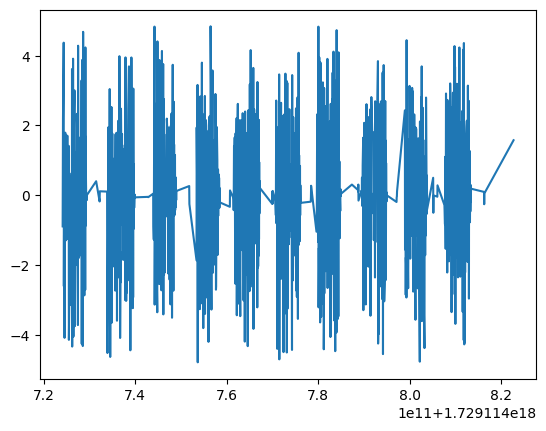

In [65]:
cs_ac.drop(cs_ac[cs_ac['active'] != True].index, inplace=True)

plt.plot(cs_ac.time, cs_ac.z)

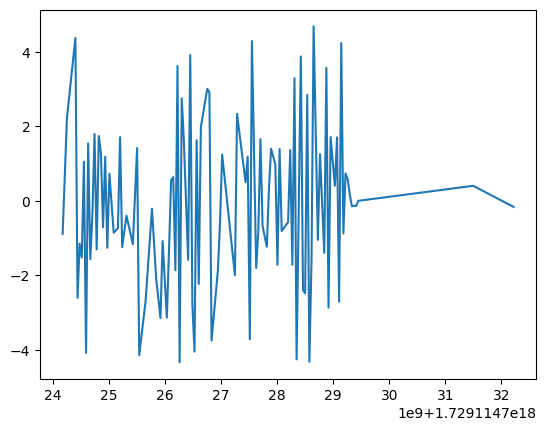

In [66]:
points_per_run = 103
plt.plot(cs_ac.head(points_per_run).time, cs_ac.head(points_per_run).z)

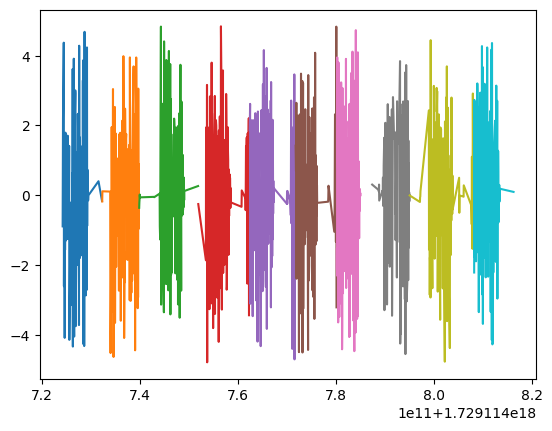

In [67]:
points_per_run = 103
increment = 103

for i in range(0,10):
    plt.plot(cs_ac[points_per_run - increment:points_per_run].time, cs_ac[points_per_run - increment:points_per_run].z)

    points_per_run += increment

## Flattening Curve Slow Data into Rows

In [68]:
points_per_run = 103
increment = 103

cs_data_rows = pd.DataFrame()

for i in range(0,10):
    tmp_df = cs_ac[points_per_run - increment:points_per_run]

    time_taken = max(tmp_df.seconds_elapsed) - min(tmp_df.seconds_elapsed)

    one_row = pd.DataFrame(tmp_df.magnitude.values.flatten()).transpose()
    one_row['time'] = [time_taken]
    # one_row['label'] = ["CS"]

    cs_data_rows = pd.concat([cs_data_rows, one_row], ignore_index=True, sort=False)

    points_per_run += increment


cs_data_rows.columns = cs_data_rows.columns.astype(str)

cs_data_rows

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,time
0,1.742149,2.250546,4.473449,2.757855,1.530576,2.478263,1.574833,4.440044,3.201811,2.041243,...,1.911624,2.309244,1.881595,2.176479,1.870181,1.694478,1.537589,1.617366,1.741895,8.042094
1,2.327219,1.846475,1.670599,4.269923,4.705505,3.191439,1.977099,2.739042,3.231184,3.339578,...,1.936396,3.763141,2.919715,3.196006,3.874643,2.127255,2.089808,2.021786,2.092321,7.511017
2,1.964121,1.790412,2.085649,1.694083,1.527661,2.039664,1.756165,1.509168,1.700939,1.534991,...,1.706918,2.019088,2.518099,2.059457,1.965532,1.921734,2.045268,1.621498,2.663930,12.025218
3,2.594402,2.208658,2.076134,2.493269,1.585359,3.280989,4.944858,2.016732,1.914693,2.182724,...,2.020645,1.580629,1.911453,2.372028,2.848579,1.813822,1.606995,2.252181,3.506575,10.356106
4,2.088739,2.935154,3.116831,2.281686,1.528577,2.458338,2.341353,1.854815,3.475939,1.746751,...,4.537835,1.927740,2.625963,2.481021,3.872049,4.874452,3.174485,2.100265,2.200769,9.331873
5,1.574156,1.988651,2.653880,2.504308,2.006297,1.759331,1.696649,2.750349,2.212959,2.557824,...,2.306130,1.659927,1.543225,2.322661,1.717913,1.870514,1.790029,4.848476,3.353515,8.345573
6,2.404828,1.769350,2.385149,3.993062,1.777328,3.757428,4.436377,3.326628,2.316716,2.606313,...,2.916913,2.824895,2.590325,2.308333,2.242285,1.986486,1.914897,2.124553,1.633840,4.855604
7,1.563565,2.059806,3.291723,2.982909,2.197968,1.637974,1.646945,1.770220,1.820618,1.847344,...,3.957118,2.939762,2.520168,2.110575,2.003295,2.319862,1.839612,1.910261,1.872235,7.624812
8,1.730797,1.532725,2.561157,3.190676,2.446366,2.477188,1.989493,2.779836,2.935106,2.269661,...,1.735405,1.706418,1.781868,1.605481,1.562872,1.718263,2.925080,1.861342,2.300557,13.049418
9,2.360549,2.936340,2.027521,2.120626,3.345866,2.478141,2.432153,2.037672,1.583724,2.140768,...,2.540565,2.325057,2.578920,2.362373,1.959983,1.788503,1.906917,2.028031,2.012269,8.042076


In [69]:
cs_data_rows.to_csv("./dataset/cs_data_rows.csv",index=False)

## Cleaning Curve Fast Accelerometer

In [70]:
tmp_df = pd.DataFrame(columns=["magnitude","active"])

for index, row in cf_ac.iterrows():
    x = row.x
    y = row.y
    z = row.z

    tmp_df.loc[len(tmp_df)] = find_active(x, y, z, min_treshold=1.2, max_treshold=4.5)

cf_ac = pd.concat([cf_ac, tmp_df], axis=1)

cf_ac

,time,seconds_elapsed,z,y,x,magnitude,active
0,1729114987950340400,0.028340,0.000000,0.000000,0.000000,0.000000,False
1,1729114987987895800,0.065896,0.001596,0.005874,-0.011253,0.012794,False
2,1729114988025830400,0.103830,0.044533,-0.006611,0.016885,0.048083,False
3,1729114988063764700,0.141765,-0.041039,-0.010302,-0.018762,0.046286,False
4,1729114988101699300,0.179699,0.039904,-0.030601,0.003223,0.050390,False
...,...,...,...,...,...,...,...
2920,1729115098718901500,110.796902,0.001064,-0.003592,-0.005816,0.006918,False
2921,1729115098756836000,110.834836,0.003590,-0.013272,-0.008080,0.015947,False
2922,1729115098794770400,110.872771,0.001181,0.001149,0.010580,0.010708,False
2923,1729115098832705000,110.910705,-1.269129,0.293492,-0.059588,1.303985,True


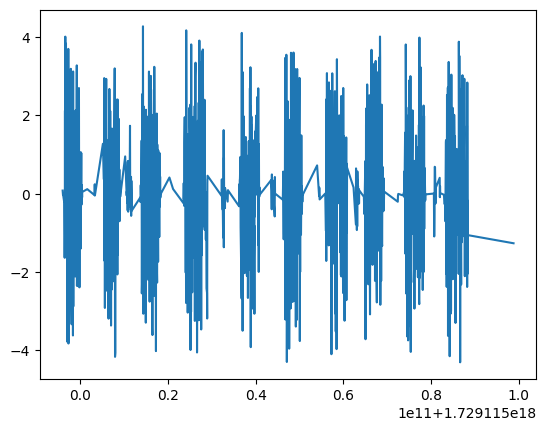

In [71]:
cf_ac.drop(cf_ac[cf_ac['active'] != True].index, inplace=True)

plt.plot(cf_ac.time, cf_ac.z)

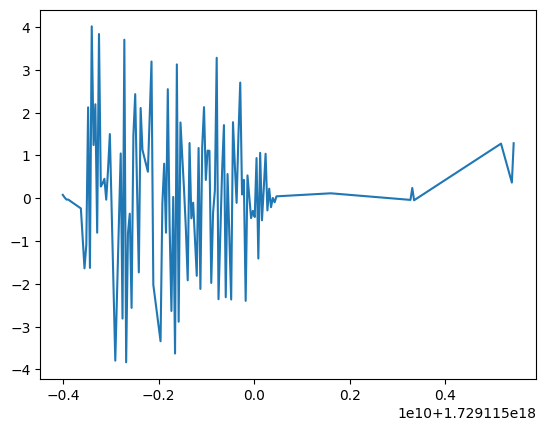

In [72]:
points_per_run = 105
plt.plot(cf_ac.head(points_per_run).time, cf_ac.head(points_per_run).z)

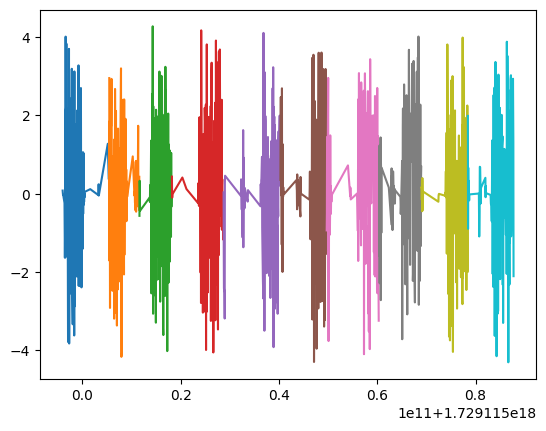

In [73]:
points_per_run = 105
increment = 105

for i in range(0,10):
    plt.plot(cf_ac[points_per_run - increment:points_per_run].time, cf_ac[points_per_run - increment:points_per_run].z)

    points_per_run += increment

## Flattening Curve Fast Data into Rows

In [74]:
points_per_run = 105
increment = 105

cf_data_rows = pd.DataFrame()

for i in range(0,10):
    tmp_df = cf_ac[points_per_run - increment:points_per_run]

    time_taken = max(tmp_df.seconds_elapsed) - min(tmp_df.seconds_elapsed)

    one_row = pd.DataFrame(tmp_df.magnitude.values.flatten()).transpose()
    one_row['time'] = [time_taken]
    # one_row['label'] = ["CF"]

    cf_data_rows = pd.concat([cf_data_rows, one_row], ignore_index=True, sort=False)

    points_per_run += increment


cf_data_rows.columns = cf_data_rows.columns.astype(str)

cf_data_rows

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,time
0,1.220110,1.343753,1.354199,1.216459,1.304769,2.071664,1.442196,2.206189,1.988942,4.055076,...,1.656810,1.355869,1.415636,1.305623,2.528849,1.799735,1.327568,1.276882,1.581912,9.445710
1,3.051739,2.255097,1.998337,1.656062,3.288846,1.893564,1.851700,2.210736,3.079208,3.493309,...,1.349674,1.396661,1.626213,1.249138,1.285455,2.748619,1.324817,2.635682,3.654437,6.107469
2,3.239227,2.221109,1.731353,1.492881,1.341988,1.682938,1.800111,1.642308,1.821374,1.599375,...,2.076098,2.004019,2.389815,1.903246,2.252983,2.434065,1.732759,1.591875,1.904805,6.562687
3,1.887755,1.833757,1.963298,1.587033,1.262227,1.436754,1.437267,1.408782,1.370303,1.434380,...,2.350719,2.758191,3.513099,3.043766,2.812755,2.880048,2.678758,2.653626,1.967182,10.469953
4,1.985602,3.066473,3.986447,4.181601,3.766433,1.313260,1.401146,1.307262,1.458217,1.337971,...,2.560722,2.633999,3.485254,3.263770,3.971340,3.163800,3.118856,3.381946,2.108350,11.532120
5,1.225862,3.125379,1.648601,2.458467,2.129480,3.335846,4.007523,3.889955,2.381442,2.411256,...,2.018503,4.359888,3.736259,2.386863,3.258493,4.444154,2.177213,2.088615,2.917924,9.331910
6,3.438521,3.723679,4.114057,3.067999,2.466214,3.350672,2.473622,4.050294,2.839703,2.195408,...,1.883103,3.065772,3.678363,1.822582,3.410408,3.771820,3.834950,4.322636,3.267707,10.583747
7,2.964102,1.896989,2.299545,2.650292,2.270512,1.727640,1.797195,1.780051,3.531001,4.448920,...,3.446445,3.294972,2.580501,3.333736,1.731026,2.008566,2.113351,3.444547,3.789592,8.573209
8,2.536646,1.977105,1.963545,1.925460,1.996514,2.231821,2.045534,2.018144,1.679843,1.425702,...,2.932296,3.412209,3.395904,3.206670,4.439973,2.833359,3.218233,3.122814,2.805369,9.407761
9,3.323856,1.812396,2.134920,1.778407,1.842351,2.066995,1.787191,1.597515,1.260286,1.453516,...,1.554557,3.821898,3.584435,2.700145,4.353761,2.219982,4.108464,3.085589,3.387396,9.293952


In [75]:
cf_data_rows.to_csv("./dataset/cf_data_rows.csv",index=False)

# Feature Engineering

In [76]:
def calculate_distances(accel_data, dt):

    # First integration to get velocity
    velocity = np.zeros_like(accel_data)
    for i in range(1, len(accel_data)):
        velocity[i] = velocity[i - 1] + (accel_data[i] + accel_data[i - 1]) / 2 * dt

    # Second integration to get distance
    distance = np.zeros_like(velocity)
    for i in range(1, len(velocity)):
        distance[i] = distance[i - 1] + (velocity[i] + velocity[i - 1]) / 2 * dt

    # Return the total distance traveled at the last data point
    return distance[-1]


In [77]:
# for index, row in ss_data_rows.iterrows():
#     print(calculate_distances(row.tolist()[:-1], 0.038))

ss_distance = []
for index, row in ss_data_rows.iterrows():
    ss_distance.append(calculate_distances(row.tolist()[:-1], 0.038))

print(ss_distance)

[4.8846434273975206, 4.196215437034874, 4.737690052014727, 4.218464656260068, 4.679288497074303, 4.277347964763025, 4.7628410564621815, 4.97642026795019, 4.309653165876136, 4.446066288300617]


In [78]:
ss_data_rows["distance"] = ss_distance

ss_data_rows

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,time,distance
0,2.371576,2.122112,2.909207,2.896534,3.585578,3.562775,3.186043,3.018978,3.135702,4.709179,...,4.879147,2.398383,3.105318,4.051899,2.096247,2.044812,2.530960,2.325784,4.514235,4.884643
1,2.211903,2.085911,2.666916,2.343165,2.031213,2.204109,2.014863,2.078244,2.076389,2.082099,...,2.356534,2.545400,2.239837,2.883761,3.001038,2.583434,2.014062,3.317880,10.356184,4.196215
2,2.962727,2.035539,2.427897,3.053663,4.277031,4.884827,2.773665,3.098241,3.322927,2.629502,...,2.261327,2.167470,2.449125,2.583810,2.581053,2.071538,2.408598,2.111740,9.976836,4.737690
3,2.029873,2.960320,2.601397,2.766443,2.728132,2.006235,2.030639,2.203344,2.755221,2.347860,...,2.218723,2.060986,2.023459,3.150228,2.192580,4.952481,2.025808,2.731471,11.645966,4.218465
4,2.823050,2.034155,3.416577,2.283977,2.600332,2.550683,3.638719,3.265535,2.213674,2.490698,...,2.140177,2.336947,2.031931,2.037253,2.515832,2.188437,2.252081,2.315338,9.900967,4.679288
5,2.645902,2.202630,2.283878,2.231912,2.424722,2.562714,2.558824,2.324147,2.023054,2.238441,...,3.621369,3.863420,2.285943,2.180671,2.162177,3.163396,2.069397,3.129875,9.483683,4.277348
6,2.168176,2.444815,2.750544,2.242590,2.142738,3.772134,3.695413,3.922720,2.588071,2.322422,...,2.767169,2.388169,2.214194,2.346595,2.436690,2.293517,2.366243,2.222404,6.638574,4.762841
7,2.068471,2.826105,4.494189,3.062824,2.370137,2.559930,3.992951,3.089477,4.630917,2.481509,...,2.242434,3.404361,2.387664,2.101436,2.225410,2.244414,3.550783,2.665907,6.031615,4.976420
8,2.595993,2.280732,2.111242,2.047253,2.002173,2.142381,2.999113,2.091458,3.865743,2.605269,...,2.482181,3.160907,3.562111,2.703941,4.241735,4.476408,4.636997,3.140430,9.483667,4.309653
9,2.053901,2.524367,2.363959,2.016465,2.883691,3.332334,2.290435,2.059972,3.652162,3.051133,...,3.257938,2.369738,2.442004,2.208651,2.483198,2.382410,2.325380,2.092158,9.711267,4.446066


In [79]:
# for index, row in sf_data_rows.iterrows():
#     print(calculate_distances(row.tolist()[:-1], 0.0425))

sf_distance = []
for index, row in sf_data_rows.iterrows():
    sf_distance.append(calculate_distances(row.tolist()[:-1], 0.0425))

print(sf_distance)

[4.674456290577248, 4.683515606359448, 4.91431399206168, 4.652505538139199, 4.47198061324182, 4.895913995708691, 4.445302380197318, 4.46693541985796, 4.627184709006757, 4.679033939818702]


In [80]:
sf_data_rows["distance"] = sf_distance

sf_data_rows

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,time,distance
0,2.715793,3.451921,2.847930,2.520625,2.295387,2.184215,2.212477,2.541820,3.727414,3.271509,...,3.013193,2.261778,2.698033,3.300384,2.430632,2.002075,2.501843,2.004883,3.414077,4.674456
1,2.349730,4.045139,2.017969,2.821946,2.929542,2.210115,2.811800,3.588242,2.222862,2.928176,...,2.572843,2.205079,2.034230,2.333482,2.423693,2.323870,3.238367,2.324386,8.497260,4.683516
2,2.798992,3.440837,2.271195,2.083719,4.399298,4.345245,2.481314,2.289419,2.957538,2.123119,...,2.731337,2.058413,2.111066,2.169513,2.377412,2.298850,2.272302,2.030336,6.297076,4.914314
3,2.449133,2.016092,3.902702,3.255774,2.947191,2.475685,2.631105,2.472141,2.006035,3.888945,...,2.333157,3.011344,3.371351,2.750013,3.062585,2.716737,4.096598,2.643325,3.452011,4.652506
4,2.328725,2.358303,2.189483,2.072514,2.254124,3.242123,2.849933,2.123119,2.792120,2.423267,...,3.088831,2.575867,2.093811,2.502501,2.999478,2.163286,2.960040,3.017243,7.966179,4.471981
5,2.637776,2.513295,2.134894,2.559395,2.022107,2.484892,2.435474,3.383720,2.405925,2.792618,...,2.919464,3.199975,2.111689,2.419192,2.656623,2.316345,2.760768,3.078082,8.004111,4.895914
6,2.257003,3.332752,2.014133,2.870286,3.839150,3.209215,2.575845,2.677402,2.263200,2.046029,...,3.106005,2.162082,2.141244,2.884161,2.193285,2.790366,2.634635,2.142737,7.624767,4.445302
7,2.310868,4.405917,3.498773,2.536722,2.217377,2.199716,2.582549,2.286486,2.441769,2.005275,...,4.375402,2.427945,2.539033,2.810792,2.151366,3.275512,3.553868,2.253181,8.383450,4.466935
8,2.930541,2.249209,2.628964,2.014306,2.175389,2.007261,2.197676,2.288425,2.289228,4.191482,...,2.363993,3.569679,2.329145,3.986133,3.540307,4.051314,3.450003,2.201831,8.876594,4.627185
9,3.586923,2.586111,2.281530,2.482879,2.372329,2.379500,3.529151,2.241529,2.806015,4.145238,...,2.124452,4.144578,3.729103,3.074080,3.558168,2.719381,2.120660,2.698640,8.990393,4.679034


In [81]:
# for index, row in cs_data_rows.iterrows():
#     print(calculate_distances(row.tolist()[:-1], 0.0225))

cs_distance = []
for index, row in cs_data_rows.iterrows():
    cs_distance.append(calculate_distances(row.tolist()[:-1], 0.02))

print(cs_distance)

[5.494332846298166, 5.480212957707171, 4.759759970422515, 5.264344565662928, 5.439271932523859, 5.420740700579144, 5.882628370718486, 4.8978480630794055, 4.982347853681223, 5.606347165031429]


In [82]:
cs_data_rows["distance"] = cs_distance

cs_data_rows

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,time,distance
0,1.742149,2.250546,4.473449,2.757855,1.530576,2.478263,1.574833,4.440044,3.201811,2.041243,...,2.309244,1.881595,2.176479,1.870181,1.694478,1.537589,1.617366,1.741895,8.042094,5.494333
1,2.327219,1.846475,1.670599,4.269923,4.705505,3.191439,1.977099,2.739042,3.231184,3.339578,...,3.763141,2.919715,3.196006,3.874643,2.127255,2.089808,2.021786,2.092321,7.511017,5.480213
2,1.964121,1.790412,2.085649,1.694083,1.527661,2.039664,1.756165,1.509168,1.700939,1.534991,...,2.019088,2.518099,2.059457,1.965532,1.921734,2.045268,1.621498,2.663930,12.025218,4.759760
3,2.594402,2.208658,2.076134,2.493269,1.585359,3.280989,4.944858,2.016732,1.914693,2.182724,...,1.580629,1.911453,2.372028,2.848579,1.813822,1.606995,2.252181,3.506575,10.356106,5.264345
4,2.088739,2.935154,3.116831,2.281686,1.528577,2.458338,2.341353,1.854815,3.475939,1.746751,...,1.927740,2.625963,2.481021,3.872049,4.874452,3.174485,2.100265,2.200769,9.331873,5.439272
5,1.574156,1.988651,2.653880,2.504308,2.006297,1.759331,1.696649,2.750349,2.212959,2.557824,...,1.659927,1.543225,2.322661,1.717913,1.870514,1.790029,4.848476,3.353515,8.345573,5.420741
6,2.404828,1.769350,2.385149,3.993062,1.777328,3.757428,4.436377,3.326628,2.316716,2.606313,...,2.824895,2.590325,2.308333,2.242285,1.986486,1.914897,2.124553,1.633840,4.855604,5.882628
7,1.563565,2.059806,3.291723,2.982909,2.197968,1.637974,1.646945,1.770220,1.820618,1.847344,...,2.939762,2.520168,2.110575,2.003295,2.319862,1.839612,1.910261,1.872235,7.624812,4.897848
8,1.730797,1.532725,2.561157,3.190676,2.446366,2.477188,1.989493,2.779836,2.935106,2.269661,...,1.706418,1.781868,1.605481,1.562872,1.718263,2.925080,1.861342,2.300557,13.049418,4.982348
9,2.360549,2.936340,2.027521,2.120626,3.345866,2.478141,2.432153,2.037672,1.583724,2.140768,...,2.325057,2.578920,2.362373,1.959983,1.788503,1.906917,2.028031,2.012269,8.042076,5.606347


In [83]:
# for index, row in cf_data_rows.iterrows():
#     print(calculate_distances(row.tolist()[:-1], 0.0225))

cf_distance = []
for index, row in cf_data_rows.iterrows():
    cf_distance.append(calculate_distances(row.tolist()[:-1], 0.02))

print(cf_distance)

[5.09800822695421, 5.355785230150496, 4.932158008394622, 5.32375417120208, 5.352570669250418, 4.995909671308669, 5.415371261512874, 4.7175418303884324, 5.3626855216819855, 4.956391618473287]


In [84]:
cf_data_rows["distance"] = cf_distance

cf_data_rows

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,time,distance
0,1.220110,1.343753,1.354199,1.216459,1.304769,2.071664,1.442196,2.206189,1.988942,4.055076,...,1.355869,1.415636,1.305623,2.528849,1.799735,1.327568,1.276882,1.581912,9.445710,5.098008
1,3.051739,2.255097,1.998337,1.656062,3.288846,1.893564,1.851700,2.210736,3.079208,3.493309,...,1.396661,1.626213,1.249138,1.285455,2.748619,1.324817,2.635682,3.654437,6.107469,5.355785
2,3.239227,2.221109,1.731353,1.492881,1.341988,1.682938,1.800111,1.642308,1.821374,1.599375,...,2.004019,2.389815,1.903246,2.252983,2.434065,1.732759,1.591875,1.904805,6.562687,4.932158
3,1.887755,1.833757,1.963298,1.587033,1.262227,1.436754,1.437267,1.408782,1.370303,1.434380,...,2.758191,3.513099,3.043766,2.812755,2.880048,2.678758,2.653626,1.967182,10.469953,5.323754
4,1.985602,3.066473,3.986447,4.181601,3.766433,1.313260,1.401146,1.307262,1.458217,1.337971,...,2.633999,3.485254,3.263770,3.971340,3.163800,3.118856,3.381946,2.108350,11.532120,5.352571
5,1.225862,3.125379,1.648601,2.458467,2.129480,3.335846,4.007523,3.889955,2.381442,2.411256,...,4.359888,3.736259,2.386863,3.258493,4.444154,2.177213,2.088615,2.917924,9.331910,4.995910
6,3.438521,3.723679,4.114057,3.067999,2.466214,3.350672,2.473622,4.050294,2.839703,2.195408,...,3.065772,3.678363,1.822582,3.410408,3.771820,3.834950,4.322636,3.267707,10.583747,5.415371
7,2.964102,1.896989,2.299545,2.650292,2.270512,1.727640,1.797195,1.780051,3.531001,4.448920,...,3.294972,2.580501,3.333736,1.731026,2.008566,2.113351,3.444547,3.789592,8.573209,4.717542
8,2.536646,1.977105,1.963545,1.925460,1.996514,2.231821,2.045534,2.018144,1.679843,1.425702,...,3.412209,3.395904,3.206670,4.439973,2.833359,3.218233,3.122814,2.805369,9.407761,5.362686
9,3.323856,1.812396,2.134920,1.778407,1.842351,2.066995,1.787191,1.597515,1.260286,1.453516,...,3.821898,3.584435,2.700145,4.353761,2.219982,4.108464,3.085589,3.387396,9.293952,4.956392


In [85]:
sum(cf_distance)+sum(cs_distance)+sum(ss_distance)+sum(sf_distance)

196.73778393312386

In [86]:
print("Shape of Stright Slow", ss_data_rows.shape)
print("Shape of Stright Fast", sf_data_rows.shape)
print("Shape of Curve Slow", cs_data_rows.shape)
print("Shape of Curve Fast", cf_data_rows.shape)

max_df_width = max([ss_data_rows.shape[1], sf_data_rows.shape[1], cs_data_rows.shape[1], cf_data_rows.shape[1]])
print(max_df_width)

Shape of Stright Slow (10, 50)
Shape of Stright Fast (10, 46)
Shape of Curve Slow (10, 105)
Shape of Curve Fast (10, 107)
107


In [87]:
ss_data_rows = pd.DataFrame(np.pad(ss_data_rows, ((0,0),(max_df_width - ss_data_rows.shape[1],0)), 'constant'))
sf_data_rows = pd.DataFrame(np.pad(sf_data_rows, ((0,0),(max_df_width - sf_data_rows.shape[1],0)), 'constant'))
cs_data_rows = pd.DataFrame(np.pad(cs_data_rows, ((0,0),(max_df_width - cs_data_rows.shape[1],0)), 'constant'))
cf_data_rows = pd.DataFrame(np.pad(cf_data_rows, ((0,0),(max_df_width - cf_data_rows.shape[1],0)), 'constant'))

In [88]:
final_dataset = pd.concat([ss_data_rows, sf_data_rows, cs_data_rows, cf_data_rows], ignore_index=True)
final_dataset

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.879147,2.398383,3.105318,4.051899,2.096247,2.044812,2.530960,2.325784,4.514235,4.884643
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.356534,2.545400,2.239837,2.883761,3.001038,2.583434,2.014062,3.317880,10.356184,4.196215
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.261327,2.167470,2.449125,2.583810,2.581053,2.071538,2.408598,2.111740,9.976836,4.737690
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.218723,2.060986,2.023459,3.150228,2.192580,4.952481,2.025808,2.731471,11.645966,4.218465
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.140177,2.336947,2.031931,2.037253,2.515832,2.188437,2.252081,2.315338,9.900967,4.679288
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.621369,3.863420,2.285943,2.180671,2.162177,3.163396,2.069397,3.129875,9.483683,4.277348
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.767169,2.388169,2.214194,2.346595,2.436690,2.293517,2.366243,2.222404,6.638574,4.762841
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.242434,3.404361,2.387664,2.101436,2.225410,2.244414,3.550783,2.665907,6.031615,4.976420
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.482181,3.160907,3.562111,2.703941,4.241735,4.476408,4.636997,3.140430,9.483667,4.309653
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.257938,2.369738,2.442004,2.208651,2.483198,2.382410,2.325380,2.092158,9.711267,4.446066


In [89]:
final_dataset.columns = final_dataset.columns.astype(str)
column_list = final_dataset.columns.to_list()
column_list[-1] = 'distance'
column_list[-2] = 'time'
final_dataset.columns = column_list

final_dataset

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,time,distance
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.879147,2.398383,3.105318,4.051899,2.096247,2.044812,2.530960,2.325784,4.514235,4.884643
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.356534,2.545400,2.239837,2.883761,3.001038,2.583434,2.014062,3.317880,10.356184,4.196215
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.261327,2.167470,2.449125,2.583810,2.581053,2.071538,2.408598,2.111740,9.976836,4.737690
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.218723,2.060986,2.023459,3.150228,2.192580,4.952481,2.025808,2.731471,11.645966,4.218465
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.140177,2.336947,2.031931,2.037253,2.515832,2.188437,2.252081,2.315338,9.900967,4.679288
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.621369,3.863420,2.285943,2.180671,2.162177,3.163396,2.069397,3.129875,9.483683,4.277348
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.767169,2.388169,2.214194,2.346595,2.436690,2.293517,2.366243,2.222404,6.638574,4.762841
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.242434,3.404361,2.387664,2.101436,2.225410,2.244414,3.550783,2.665907,6.031615,4.976420
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.482181,3.160907,3.562111,2.703941,4.241735,4.476408,4.636997,3.140430,9.483667,4.309653
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.257938,2.369738,2.442004,2.208651,2.483198,2.382410,2.325380,2.092158,9.711267,4.446066


In [90]:
final_dataset.to_csv("A3_Final_dataset.csv", index = False)

# Regression Models

## Train Test Split

In [91]:
train, test = train_test_split(final_dataset, test_size = 0.20, random_state=32)

In [92]:
X_train = train.drop(columns=["distance"], axis=1)
Y_train = train["distance"]

X_test = test.drop(columns=["distance"], axis=1)
Y_test = test["distance"]

## Random Forest Regression

In [93]:
rfr = RandomForestRegressor(max_depth=2, random_state=64)
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=64)

In [94]:
y_predict = rfr.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(Y_test, y_predict)))
print("MAE", mean_absolute_error(Y_test, y_predict))
print("R2", r2_score(Y_test, y_predict))

RMSE 0.3653024738137903
MAE 0.3113483568104377
R2 0.3791133975412969


## Support Vector Regression

In [95]:
svr = SVR(C=1.0, epsilon=0.1)
svr.fit(X_train, Y_train)

SVR()

In [96]:
y_predict = svr.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(Y_test, y_predict)))
print("MAE", mean_absolute_error(Y_test, y_predict))
print("R2", r2_score(Y_test, y_predict))

RMSE 0.3080486627385054
MAE 0.2590526789556691
R2 0.5584847407432223


# Cleaning New Data

In [97]:
# Load the dataset
new_data = pd.read_csv('27_meters_mixed\Accelerometer.csv')

new_data

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Roya\AppData\Local\Temp\ipykernel_9204\782847831.py:2: SyntaxWarning: invalid escape sequence '\A'
  new_data = pd.read_csv('27_meters_mixed\Accelerometer.csv')


,time,seconds_elapsed,z,y,x
0,1730998120162207000,0.183207,0.000003,-0.017773,-0.022104
1,1730998120200145000,0.221145,0.009278,-0.018702,0.004497
2,1730998120238083000,0.259083,0.007179,-0.015994,-0.012147
3,1730998120276021000,0.297021,-0.000201,-0.009616,-0.000133
4,1730998120313959200,0.334959,-0.002226,-0.001735,-0.002528
...,...,...,...,...,...
1219,1730998166408618200,46.429618,0.002518,-0.001451,-0.007385
1220,1730998166446556200,46.467556,-0.009562,0.009612,-0.000045
1221,1730998166484493800,46.505494,0.860743,-0.134549,-0.011310
1222,1730998166522431700,46.543432,0.002940,0.002428,-0.004590


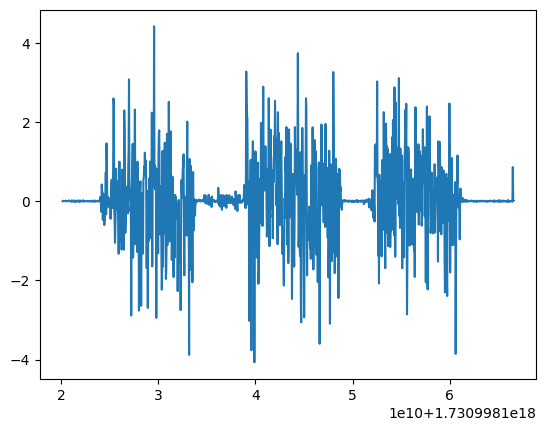

In [98]:
plt.plot(new_data.time, new_data.z)

In [99]:
new_data

,time,seconds_elapsed,z,y,x
0,1730998120162207000,0.183207,0.000003,-0.017773,-0.022104
1,1730998120200145000,0.221145,0.009278,-0.018702,0.004497
2,1730998120238083000,0.259083,0.007179,-0.015994,-0.012147
3,1730998120276021000,0.297021,-0.000201,-0.009616,-0.000133
4,1730998120313959200,0.334959,-0.002226,-0.001735,-0.002528
...,...,...,...,...,...
1219,1730998166408618200,46.429618,0.002518,-0.001451,-0.007385
1220,1730998166446556200,46.467556,-0.009562,0.009612,-0.000045
1221,1730998166484493800,46.505494,0.860743,-0.134549,-0.011310
1222,1730998166522431700,46.543432,0.002940,0.002428,-0.004590


In [100]:
# Ensure tmp_df is initialized with unique column names
tmp_df = pd.DataFrame(columns=["computed_magnitude", "active_flag"])

# Process rows in new_data
for index, row in new_data.iterrows():
    x = row.x
    y = row.y
    z = row.z

    # Compute magnitude and active flag
    magnitude, active = find_active(x, y, z, min_treshold=1.5, max_treshold=5)
    tmp_df.loc[len(tmp_df)] = [magnitude, active]

# Concatenate with the original data
new_data = pd.concat([new_data, tmp_df], axis=1)

new_data.dropna(axis=0, inplace=True)

new_data

,time,seconds_elapsed,z,y,x,computed_magnitude,active_flag
0,1730998120162207000,0.183207,0.000003,-0.017773,-0.022104,0.028364,False
1,1730998120200145000,0.221145,0.009278,-0.018702,0.004497,0.021356,False
2,1730998120238083000,0.259083,0.007179,-0.015994,-0.012147,0.021328,False
3,1730998120276021000,0.297021,-0.000201,-0.009616,-0.000133,0.009619,False
4,1730998120313959200,0.334959,-0.002226,-0.001735,-0.002528,0.003789,False
...,...,...,...,...,...,...,...
1219,1730998166408618200,46.429618,0.002518,-0.001451,-0.007385,0.007936,False
1220,1730998166446556200,46.467556,-0.009562,0.009612,-0.000045,0.013558,False
1221,1730998166484493800,46.505494,0.860743,-0.134549,-0.011310,0.871269,False
1222,1730998166522431700,46.543432,0.002940,0.002428,-0.004590,0.005968,False


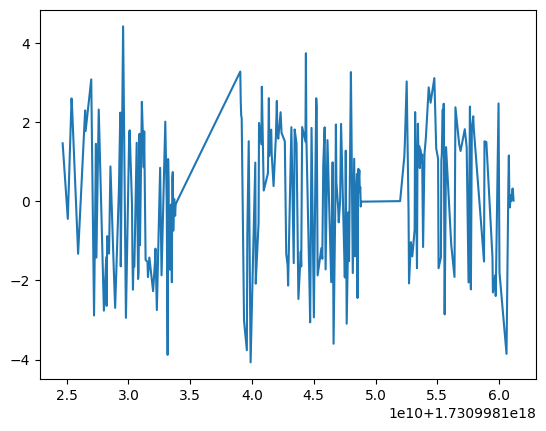

In [101]:
new_data.drop(new_data[new_data['active_flag'] != True].index, inplace=True)

plt.plot(new_data.time, new_data.z)

In [102]:
new_data.shape[0]

239

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


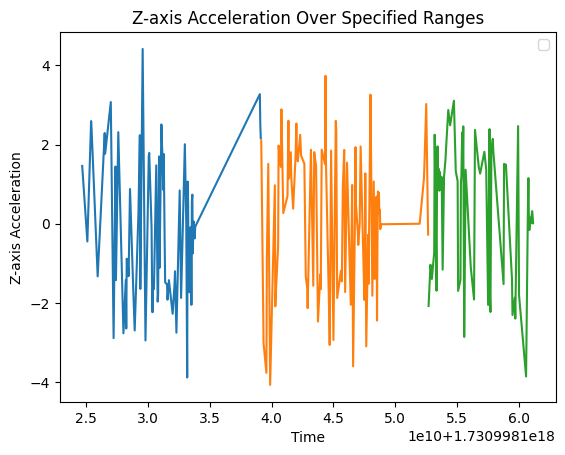

In [103]:
ranges = [
    (0, 75),   
    (75, 170), 
    (170, new_data.shape[0]), 
]

# Plot each range
for start, end in ranges:
    plt.plot(new_data[start:end].time, new_data[start:end].z)

plt.xlabel("Time")
plt.ylabel("Z-axis Acceleration")
plt.title("Z-axis Acceleration Over Specified Ranges")
plt.legend()
plt.show()

In [104]:
new_data_rows = pd.DataFrame()

ranges = [
    (0, 75),   
    (75, 170), 
    (170, new_data.shape[0]), 
]

# Desired number of columns
num_columns = 105

# Process each range
for start, end in ranges:
    tmp_df = new_data[start:end]

    # Calculate the time taken for the range
    time_taken = max(tmp_df.seconds_elapsed) - min(tmp_df.seconds_elapsed)

    # Extract the computed magnitude values
    magnitude_values = tmp_df.computed_magnitude.values.flatten()

    # Ensure the row has exactly num_columns (107)
    if len(magnitude_values) < num_columns:
        # Pre-pad with zeros if shorter
        padded_values = np.pad(
            magnitude_values,
            pad_width=(num_columns - len(magnitude_values), 0),  # Pre-padding with zeros
            mode='constant',
            constant_values=0
        )
    else:
        # Truncate if longer
        padded_values = magnitude_values[-num_columns:]

    # Create a DataFrame row with the padded/truncated values and time
    one_row = pd.DataFrame([padded_values])
    one_row['time'] = time_taken
    
    # Append the row to the resulting DataFrame
    new_data_rows = pd.concat([new_data_rows, one_row], ignore_index=True, sort=False)

# Update the column names for clarity
# feature_columns = [f"feature_{i}" for i in range(1, num_columns + 1)] + ['time']
feature_columns = [f"{i}" for i in range(0, num_columns)] + ['time']
new_data_rows.columns = feature_columns

print(new_data_rows.shape)
new_data_rows

(3, 106)


,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.153635,1.827736,1.856267,1.862924,1.901836,1.552597,3.317288,2.520488,2.179750,14.454384
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.721752,2.335413,1.803400,1.732450,1.510300,1.736189,1.549092,3.040929,1.676744,13.505927
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.653007,1.779722,1.725265,1.854596,1.547435,1.782263,1.846206,1.554779,1.682553,8.460164


In [105]:
new_data_distance = []
for index, row in new_data_rows.iterrows():
    new_data_distance.append(calculate_distances(row.tolist()[:-1], 0.03))

print(new_data_distance)

[5.423235889990843, 8.789137135804223, 4.449764039968314]


In [106]:
new_data_rows["distance"] = new_data_distance

new_data_rows

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,time,distance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.827736,1.856267,1.862924,1.901836,1.552597,3.317288,2.520488,2.179750,14.454384,5.423236
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.335413,1.803400,1.732450,1.510300,1.736189,1.549092,3.040929,1.676744,13.505927,8.789137
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.779722,1.725265,1.854596,1.547435,1.782263,1.846206,1.554779,1.682553,8.460164,4.449764


In [107]:
new_data_rows.to_csv("A4_New_Data.csv", index=False)

# Load Old and New Data

In [108]:
A3_Data = pd.read_csv("A3_Final_dataset.csv")
A4_Data = pd.read_csv("A4_New_Data.csv")

In [109]:
A3_Data

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,time,distance
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.879147,2.398383,3.105318,4.051899,2.096247,2.044812,2.530960,2.325784,4.514235,4.884643
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.356534,2.545400,2.239837,2.883761,3.001038,2.583434,2.014062,3.317880,10.356184,4.196215
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.261327,2.167470,2.449125,2.583810,2.581053,2.071538,2.408598,2.111740,9.976836,4.737690
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.218723,2.060986,2.023459,3.150228,2.192580,4.952481,2.025808,2.731471,11.645966,4.218465
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.140177,2.336947,2.031931,2.037253,2.515832,2.188437,2.252081,2.315338,9.900967,4.679288
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.621369,3.863420,2.285943,2.180671,2.162177,3.163396,2.069397,3.129875,9.483683,4.277348
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.767169,2.388169,2.214194,2.346595,2.436690,2.293517,2.366243,2.222404,6.638574,4.762841
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.242434,3.404361,2.387664,2.101436,2.225410,2.244414,3.550783,2.665907,6.031615,4.976420
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.482181,3.160907,3.562111,2.703941,4.241735,4.476408,4.636997,3.140430,9.483667,4.309653
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.257938,2.369738,2.442004,2.208651,2.483198,2.382410,2.325380,2.092158,9.711267,4.446066


In [110]:
A4_Data

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,time,distance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.827736,1.856267,1.862924,1.901836,1.552597,3.317288,2.520488,2.179750,14.454384,5.423236
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.335413,1.803400,1.732450,1.510300,1.736189,1.549092,3.040929,1.676744,13.505927,8.789137
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.779722,1.725265,1.854596,1.547435,1.782263,1.846206,1.554779,1.682553,8.460164,4.449764


In [111]:
A4_Data

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,time,distance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.827736,1.856267,1.862924,1.901836,1.552597,3.317288,2.520488,2.179750,14.454384,5.423236
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.335413,1.803400,1.732450,1.510300,1.736189,1.549092,3.040929,1.676744,13.505927,8.789137
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.779722,1.725265,1.854596,1.547435,1.782263,1.846206,1.554779,1.682553,8.460164,4.449764


# CNN-GRU Model

In [112]:
class HybridCNN_GRU(nn.Module):
    def __init__(self, gru_hidden_size=128, gru_num_layers=2):
        super(HybridCNN_GRU, self).__init__()
        self.conv1 = None  
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.gru = None  
        self.fc = nn.Linear(gru_hidden_size, 1)
        self.gru_hidden_size = gru_hidden_size
        self.gru_num_layers = gru_num_layers

    def initialize_layers(self, input_features):
        
        self.conv1 = nn.Conv1d(in_channels=input_features, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.gru = nn.GRU(input_size=64, hidden_size=self.gru_hidden_size, num_layers=self.gru_num_layers, batch_first=True)

    def forward(self, x):
        if self.conv1 is None or self.gru is None:
            raise ValueError("Model layers not initialized. Call `initialize_layers` with input_features first.")
        x = x.permute(0, 2, 1)  
        x = self.conv1(x)
        x = self.relu(x)
        if x.size(2) < 2:
            print("Skipping pooling due to small input size.")
        else:
            x = self.pool(x)
        x = x.permute(0, 2, 1)  
        x, _ = self.gru(x)
        x = x[:, -1, :]  
        x = self.fc(x)
        return x

def dataframe_to_tensor(data):
    features = data.iloc[:, :-1].values  
    targets = data.iloc[:, -1].values.reshape(-1, 1)  

    # Automatically reshape features to 3D: [samples, sequence_length=1, features]
    features = features.reshape(features.shape[0], 1, features.shape[1])
    features_tensor = torch.tensor(features, dtype=torch.float32)
    targets_tensor = torch.tensor(targets, dtype=torch.float32)
    return features_tensor, targets_tensor

Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Epoch 1/10, Train Loss: 24.3359, Validation Loss: 22.1294
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Epoch 2/10, Train Loss: 21.2366, Validation Loss: 17.2708
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Epoch 3/10, Train Loss: 14.9537, Validation Loss: 9.4036
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small input size.
Skipping pooling due to small

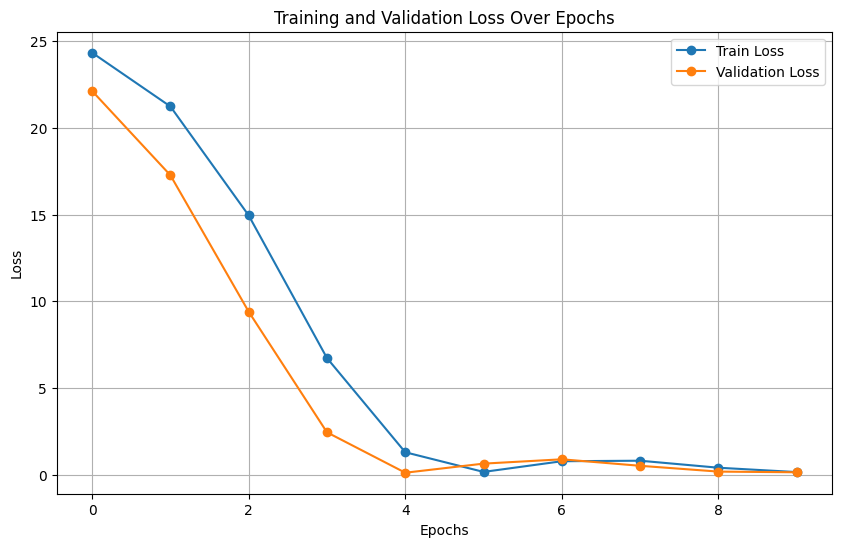

In [113]:
def train_model_with_validation(model, train_loader, val_loader, criterion, optimizer, epochs):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        for data, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item() * data.size(0)  # Accumulate loss
        
        avg_train_loss = total_train_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for data, targets in val_loader:
                outputs = model(data)
                loss = criterion(outputs, targets)
                total_val_loss += loss.item() * data.size(0)  # Accumulate loss
        
        avg_val_loss = total_val_loss / len(val_loader.dataset)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Plot Loss Curves
def plot_loss_curves(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(val_losses, label='Validation Loss', marker='o')
    plt.title("Training and Validation Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

train_data, val_data = train_test_split(A3_Data, test_size=0.2, random_state=42)

x_train, y_train = dataframe_to_tensor(train_data)
x_val, y_val = dataframe_to_tensor(val_data)

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)

val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(dataset=val_dataset, batch_size=10, shuffle=False)

model = HybridCNN_GRU(gru_hidden_size=128, gru_num_layers=2)
model.initialize_layers(input_features=x_train.shape[2])

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
train_losses, val_losses = train_model_with_validation(model, train_loader, val_loader, criterion, optimizer, epochs)

plot_loss_curves(train_losses, val_losses)

# Testing Models on New Data

## Testing CNN-GRU Model

In [114]:
def evaluate_new_data(model, new_data, criterion, batch_size=10):
      
    x_new, y_new = dataframe_to_tensor(new_data)
    
    new_dataset = TensorDataset(x_new, y_new)
    new_loader = DataLoader(dataset=new_dataset, batch_size=batch_size, shuffle=False)
    
    model.eval()
    total_loss = 0
    total_samples = 0
    
    with torch.no_grad():
        for data, targets in new_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            total_loss += loss.item() * data.size(0)  # Accumulate loss
            total_samples += data.size(0)
    
    avg_loss = total_loss / total_samples
    print(f"Evaluation Loss on New Data: {avg_loss:.4f}")
    return avg_loss

new_data_loss = evaluate_new_data(model, A4_Data, criterion)


Skipping pooling due to small input size.
Evaluation Loss on New Data: 5.3383


## Testing Random Forest Model 

In [115]:
new_data = pd.read_csv("A4_New_Data.csv")
X_test = new_data.drop(columns=["distance"], axis=1)
Y_test = new_data["distance"]

In [116]:
y_predict = rfr.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(Y_test, y_predict)))
print("MAE", mean_absolute_error(Y_test, y_predict))
print("R2", r2_score(Y_test, y_predict))

RMSE 2.1908632874040395
MAE 1.5995380790642002
R2 -0.3887164333154096


## Testing SVR

In [117]:
y_predict = svr.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(Y_test, y_predict)))
print("MAE", mean_absolute_error(Y_test, y_predict))
print("R2", r2_score(Y_test, y_predict))

RMSE 2.281100240449355
MAE 1.6134487667750426
R2 -0.5054688003743055
